# Calculate CMIP Indeces

This file 
1. calculates all the indeces for all months for all cmip models.

    (a). use EC index for nino



In [1]:
#import my functions (make utils._init file?)
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp
import utils.compound as compound
import utils.ecIndex as ec
import utils.overlapBins as overlapBins


In [2]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
modelSet=_model.scenarioMip

In [5]:
experimentSet=_model.experimentSet

In [6]:
nino34Domain=_index.sstIndex['nino34']

nino34Domain

{'latMin': -5, 'latMax': 5, 'longMin': 190, 'longMax': 240}

In [7]:
#figure out where to plot nino34 box on anomaly plots
mapCentre=210
nino34Box={
    'xy':[nino34Domain['longMin']-mapCentre, nino34Domain['latMin']],
    'width':nino34Domain['longMax']-nino34Domain['longMin'],
    'height':nino34Domain['latMax']-nino34Domain['latMin']
}

nino34Box

{'xy': [-20, -5], 'width': 50, 'height': 10}

# 1. Calculate CMIP Indeces

For each experiment in historical, calculate indices

#The heavy lifting - you need the output from this to proceed

%run ./cmipECIndeces.py

In [8]:
multipliers={'ACCESS-CM2':[-1,1], 
    'ACCESS-ESM1-5':[1,-1],
    'AWI-CM-1-1-MR':[-1,-1],
    'BCC-CSM2-MR':[1,-1],
    'CAMS-CSM1-0':[-1,-1],
    'CAS-ESM2-0':[-1,1],
    'CESM2':[-1,-1], 
    'CESM2-WACCM':[-1,-1],
    'CIESM':[-1,1], 
    'CMCC-CM2-SR5':[1,1],
    'CMCC-ESM2':[-1,-1], 
    'CNRM-CM6-1':[-1,1], 
    'CNRM-ESM2-1':[-1,-1], 
    'CanESM5':[-1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[-1,-1], 
    'EC-Earth3-CC':[-1,-1], 
    'EC-Earth3-Veg':[-1,1],
    'EC-Earth3-Veg-LR':[-1,1], 
    'FIO-ESM-2-0':[1,-1],
    'GFDL-CM4':[-1,-1], 
    'GFDL-ESM4':[-1,-1], 
    'GISS-E2-1-G':[-1,1],
    'HadGEM3-GC31-LL':[-1,-1], 
    'HadGEM3-GC31-MM':[1,-1], 
    'INM-CM4-8':[-1,1], 
    'INM-CM5-0':[1,1],
    'IPSL-CM6A-LR':[1,1], 
    'MCM-UA-1-0':[1,1], 
    'MIROC-ES2L':[1,1], 
    'MIROC6':[1,-1],
    'MPI-ESM1-2-HR':[1,1], 
    'MPI-ESM1-2-LR':[1,-1],
    'MRI-ESM2-0':[-1,1], 
    'NESM3':[1,-1],
    'NorESM2-LM':[1,-1], 
    'NorESM2-MM':[-1,-1], 
    'UKESM1-0-LL':[-1,-1] 
    }

ACCESS-CM2
[-1, 1]


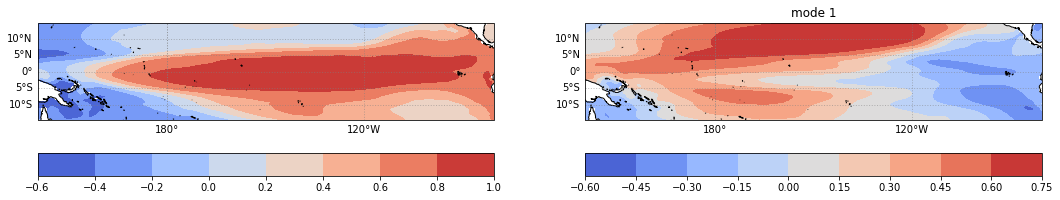

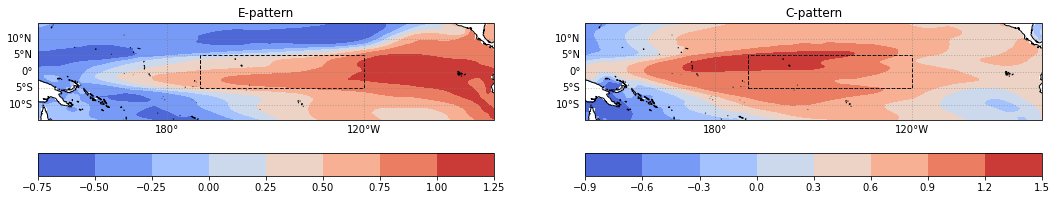

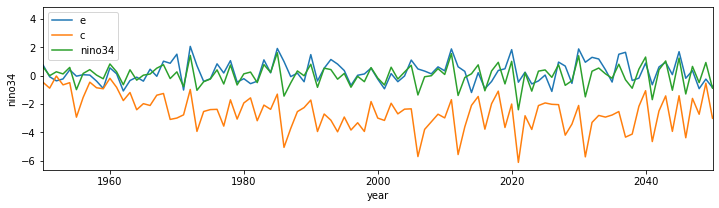

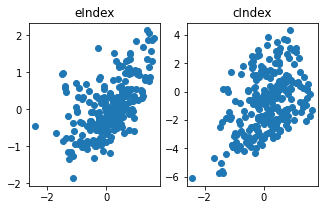

ACCESS-ESM1-5
[1, -1]


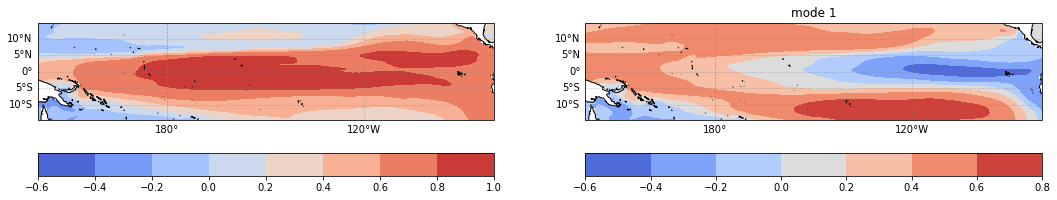

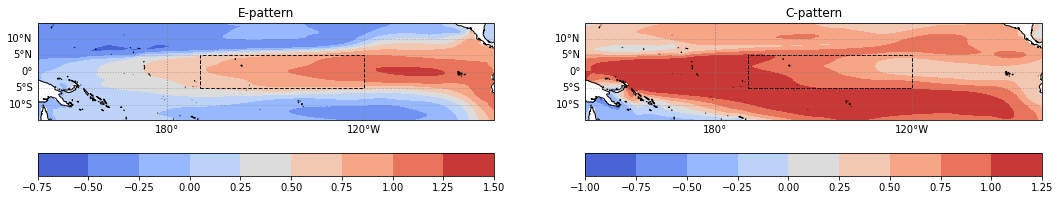

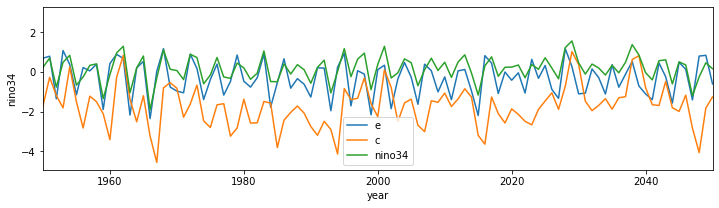

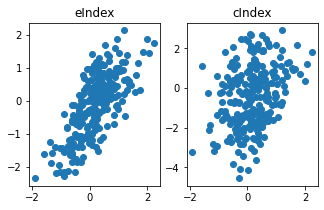

AWI-CM-1-1-MR
[-1, -1]
Cannot print patterns
Input z must be 2D, not 1D


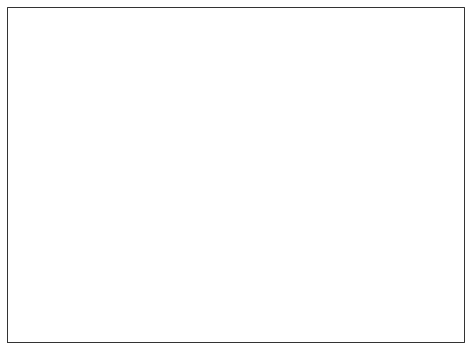

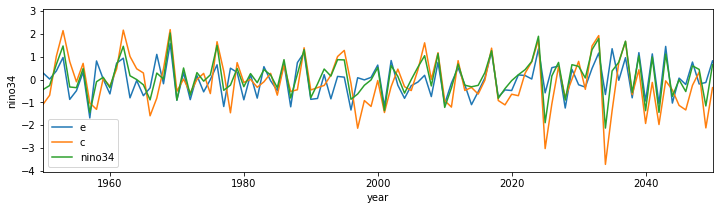

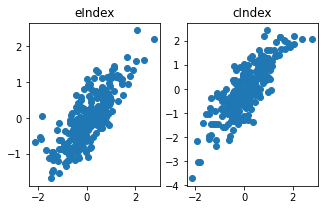

BCC-CSM2-MR
[1, -1]


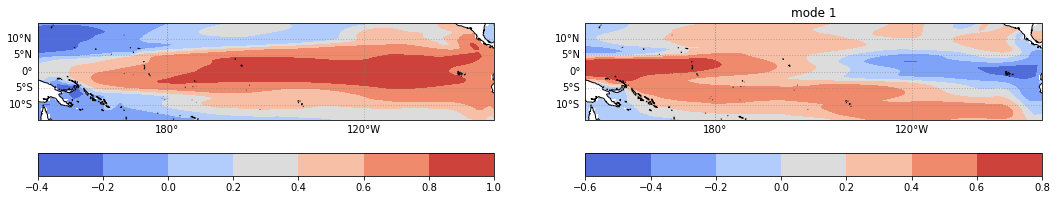

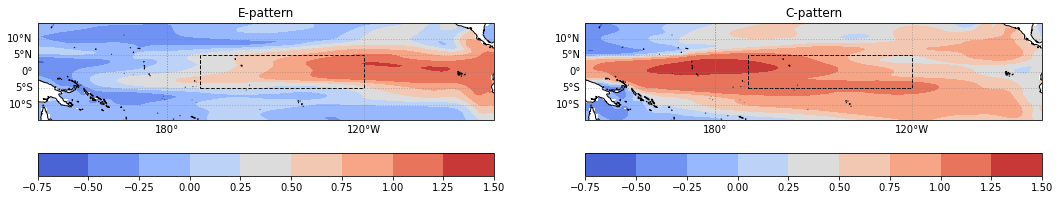

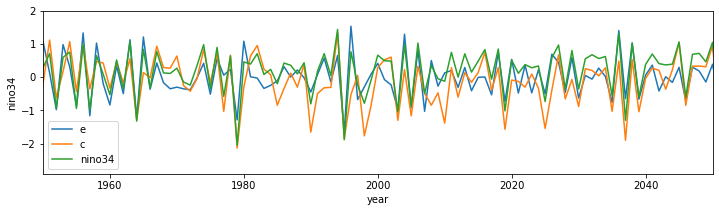

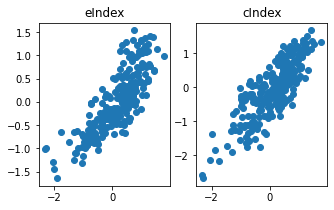

CAMS-CSM1-0
[-1, -1]


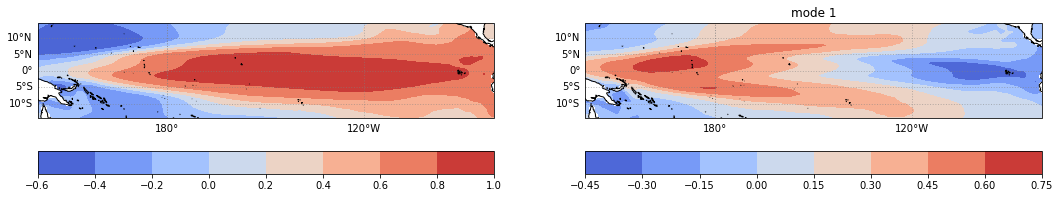

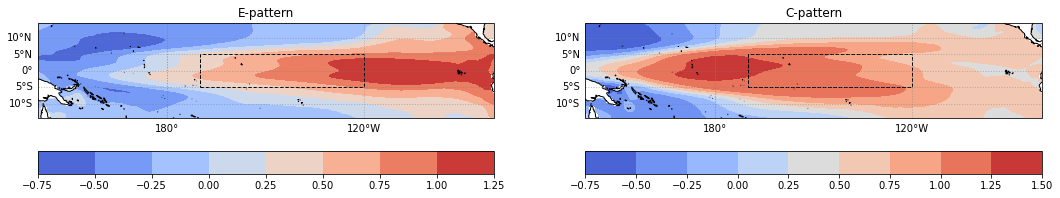

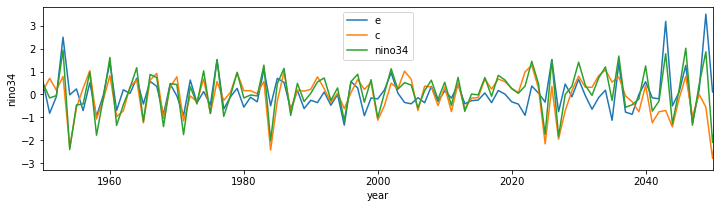

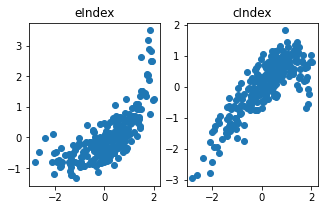

CAS-ESM2-0
[-1, 1]


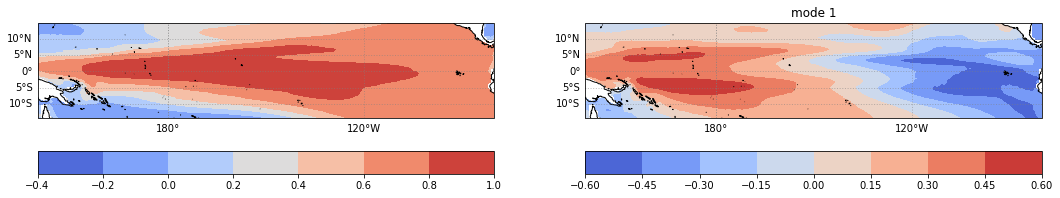

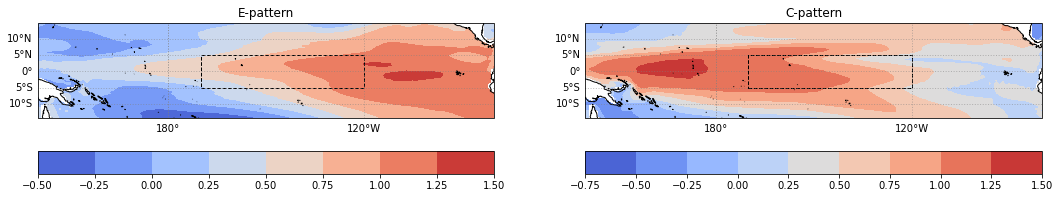

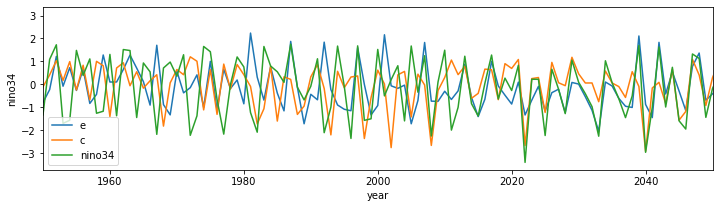

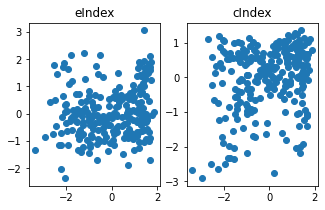

CESM2
[-1, -1]


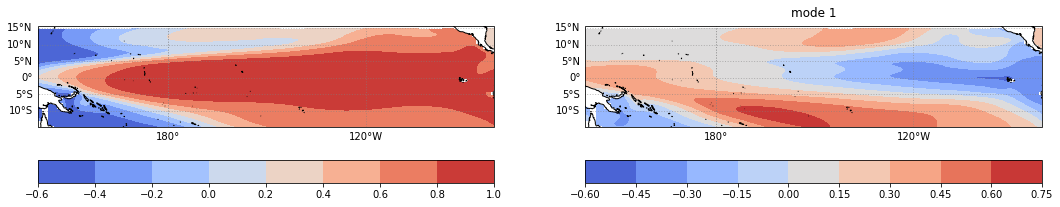

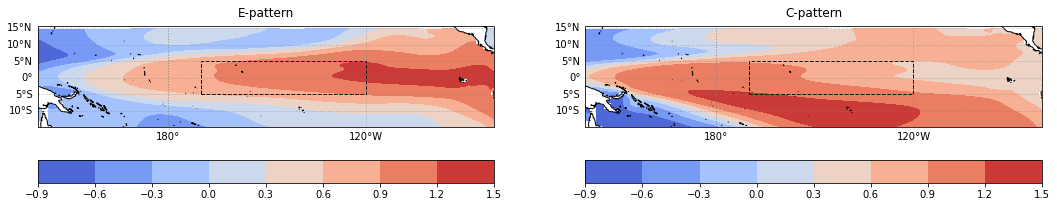

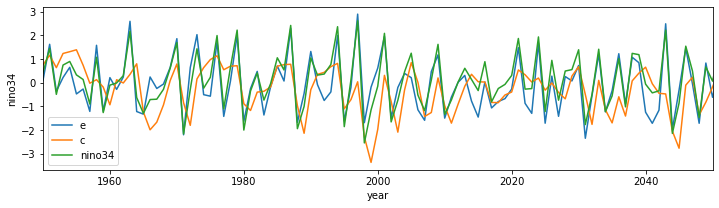

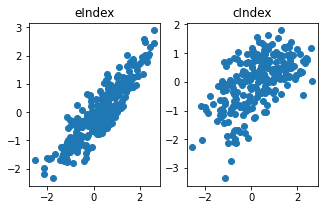

CESM2-WACCM
[-1, -1]


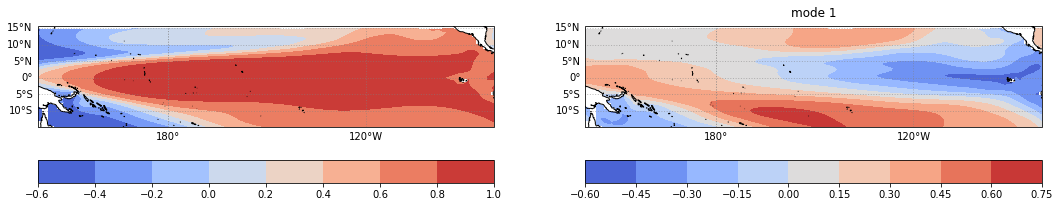

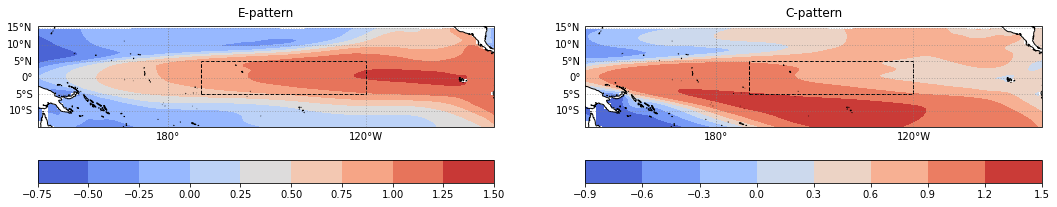

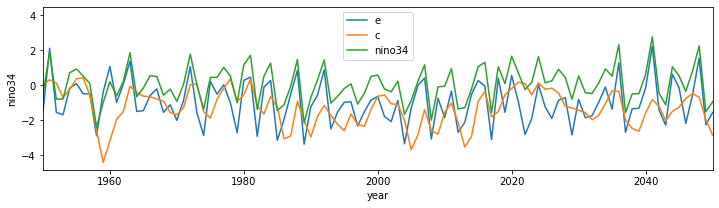

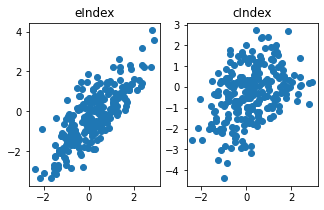

CIESM
[-1, 1]


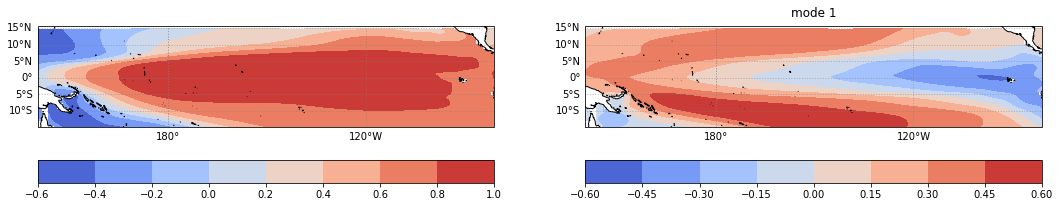

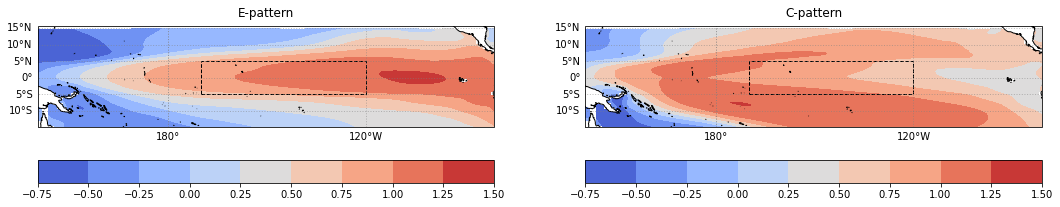

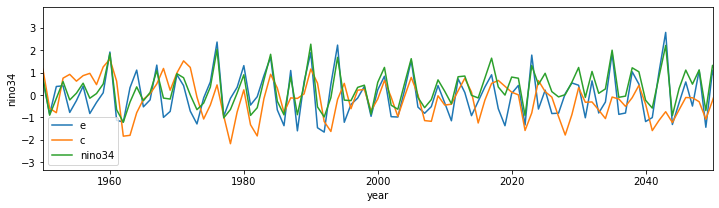

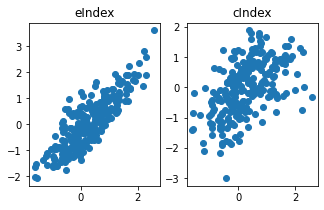

CMCC-CM2-SR5
[1, 1]


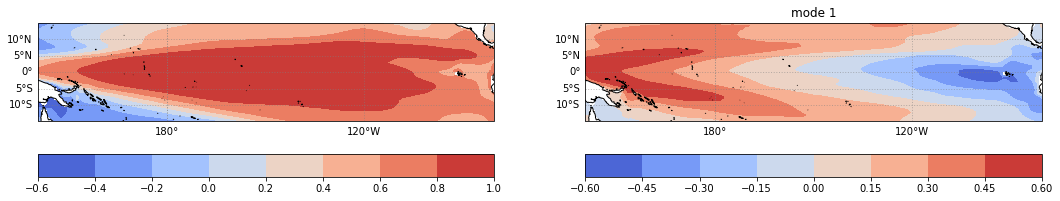

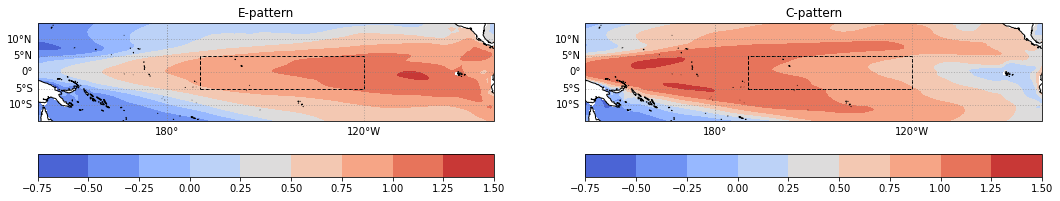

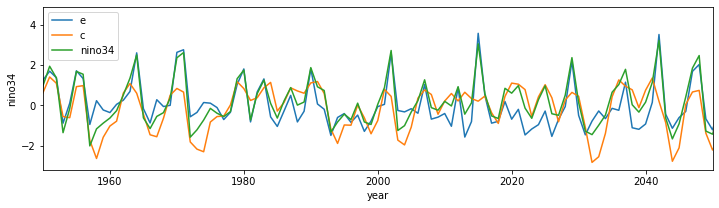

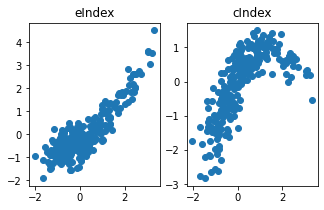

CMCC-ESM2
[-1, -1]


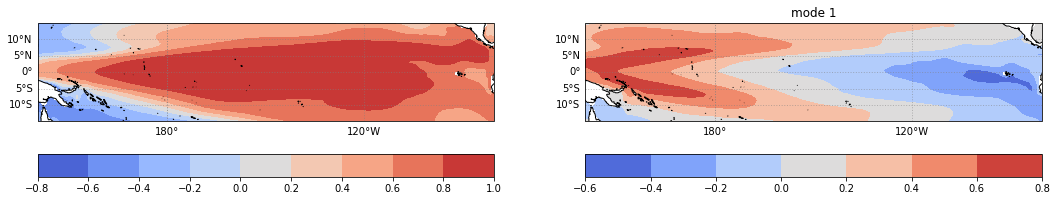

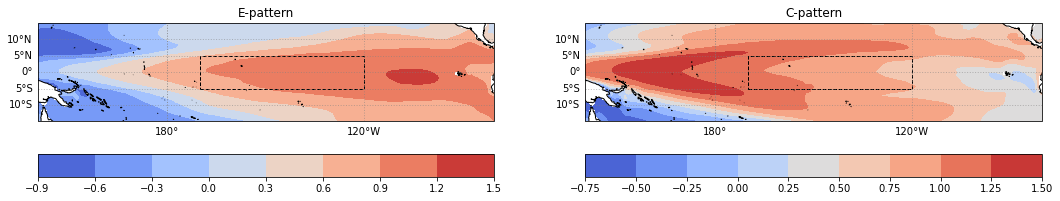

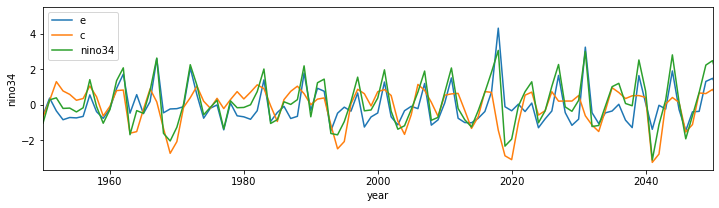

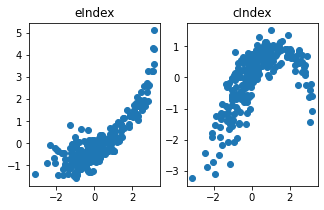

CNRM-CM6-1
[-1, 1]


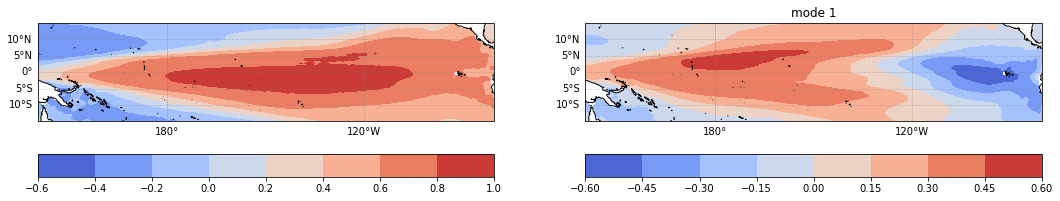

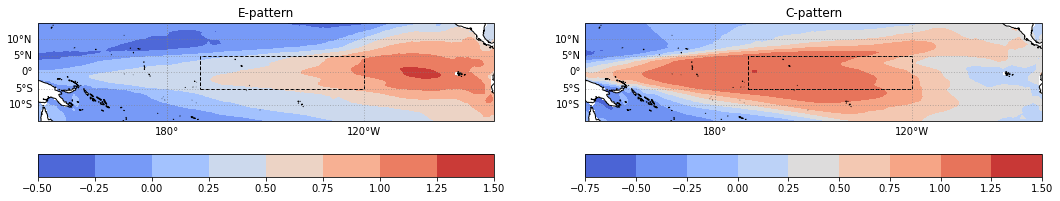

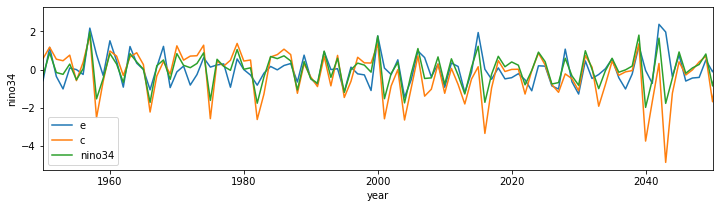

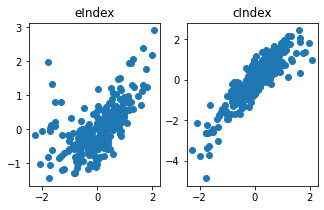

CNRM-ESM2-1
[-1, -1]


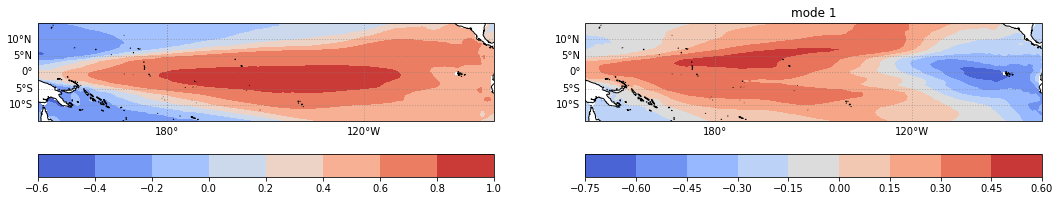

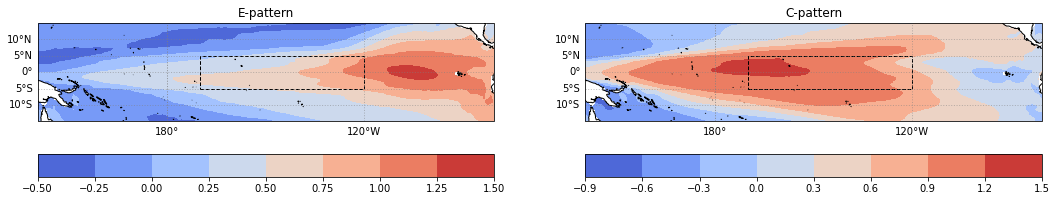

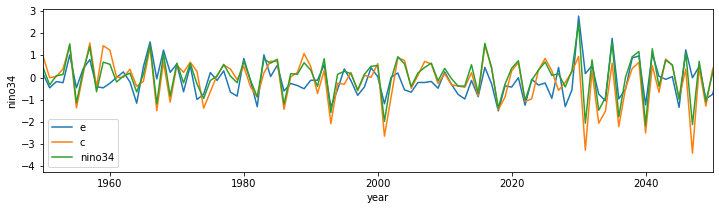

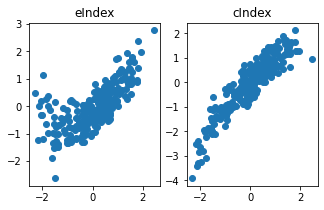

CanESM5
[-1, -1]


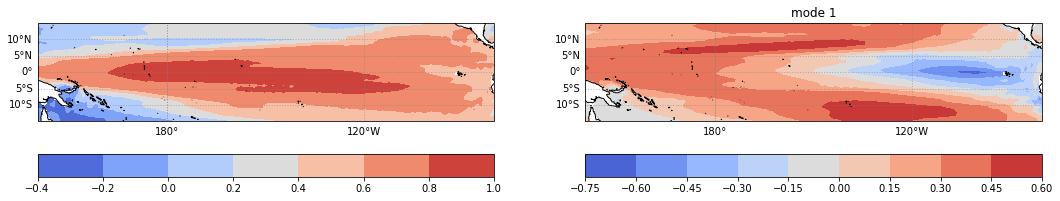

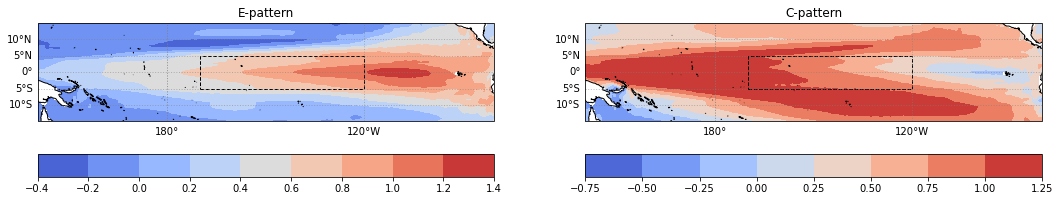

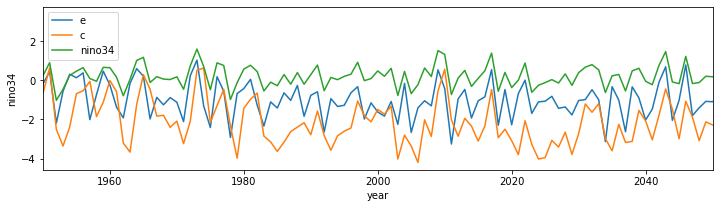

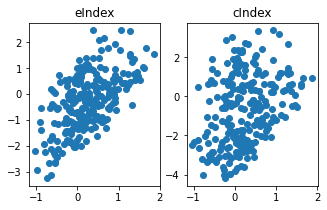

CanESM5-CanOE
[1, -1]


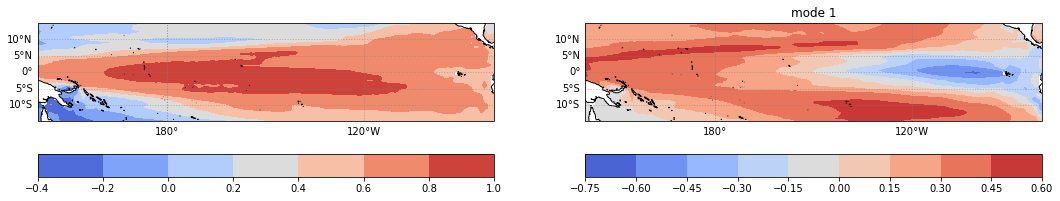

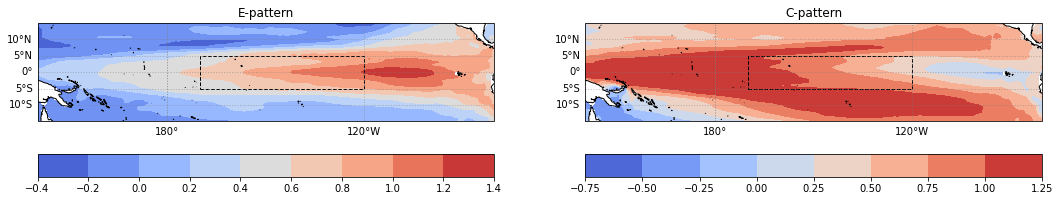

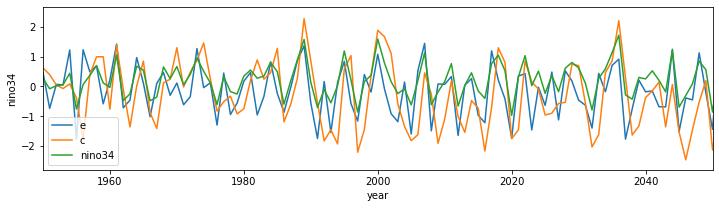

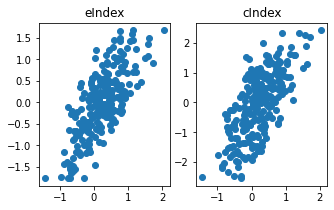

EC-Earth3
[-1, -1]


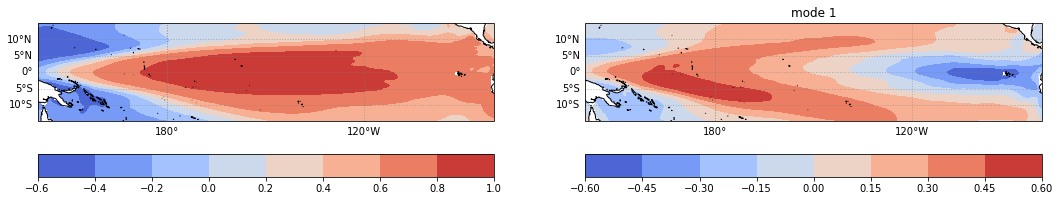

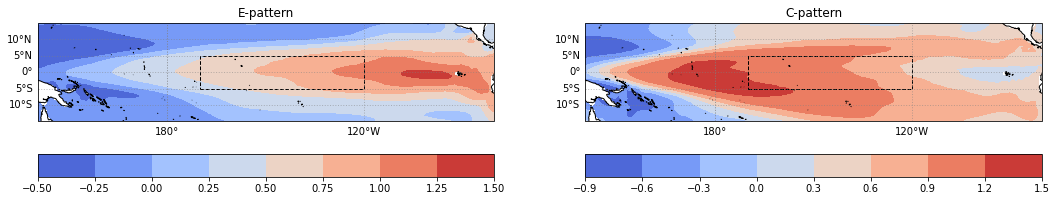

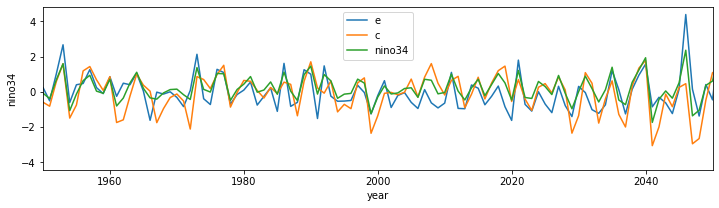

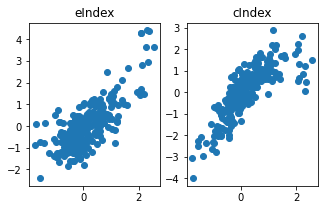

EC-Earth3-CC
[-1, -1]


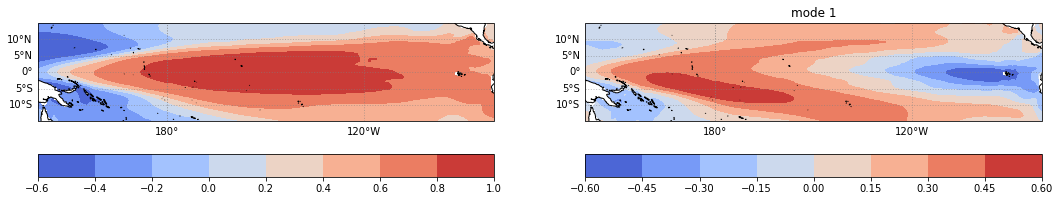

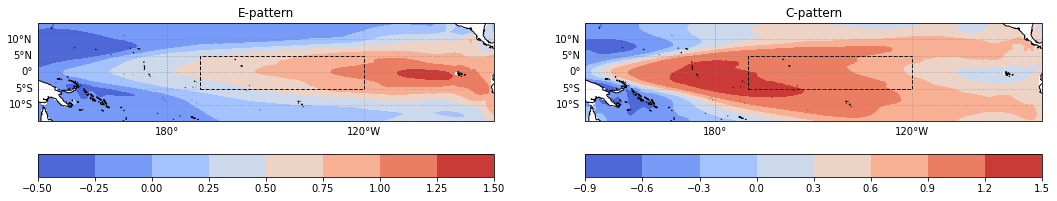

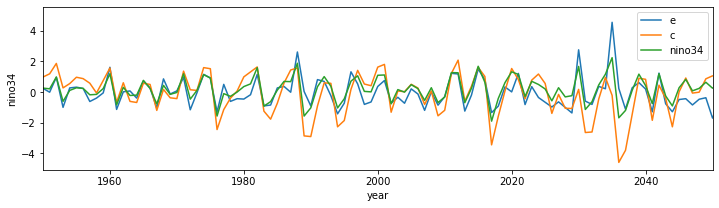

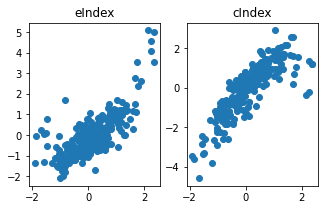

EC-Earth3-Veg
[-1, 1]


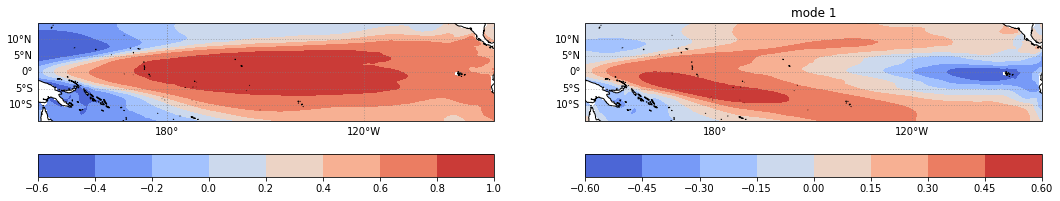

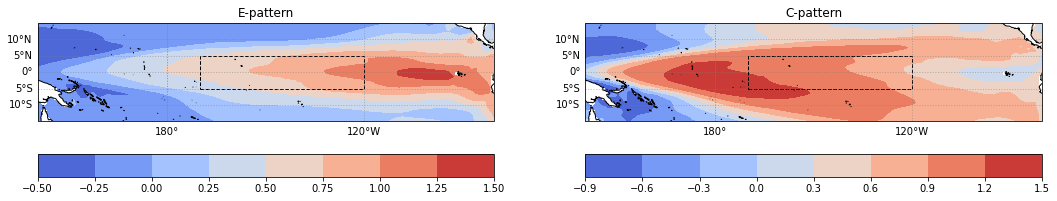

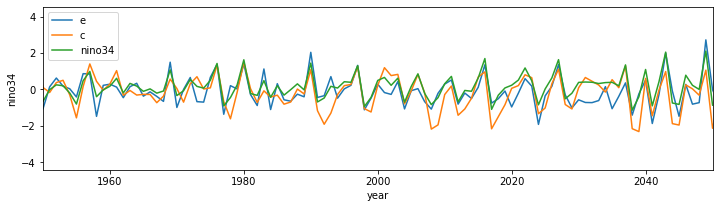

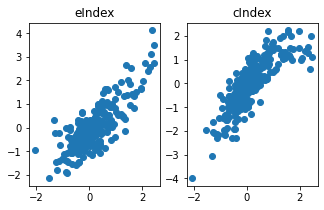

EC-Earth3-Veg-LR
[-1, 1]


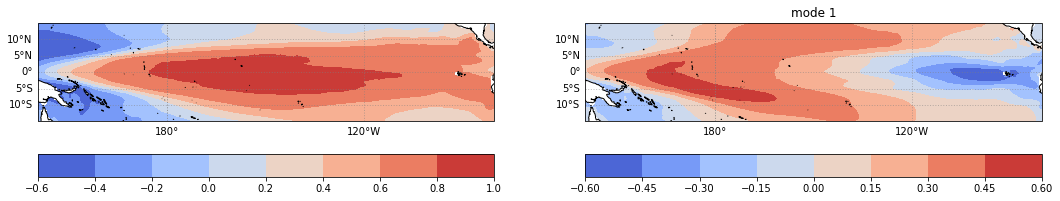

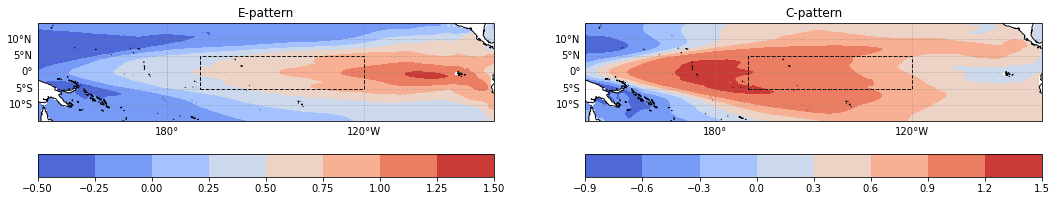

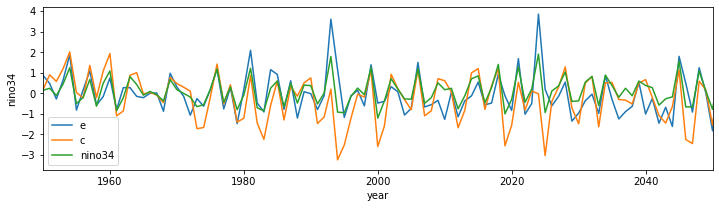

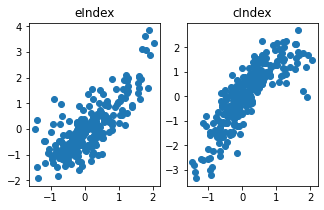

FIO-ESM-2-0
[1, -1]


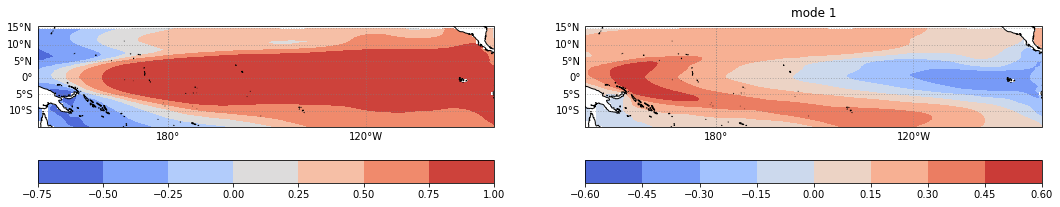

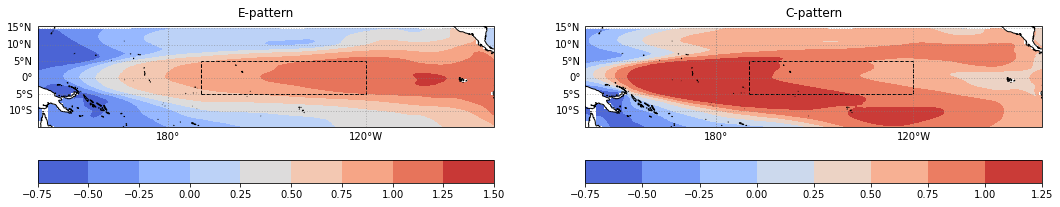

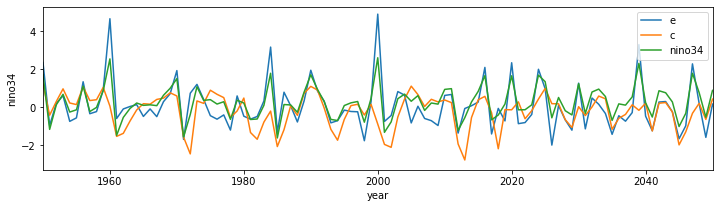

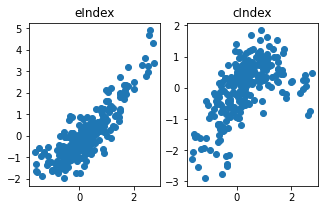

GFDL-CM4
[-1, -1]


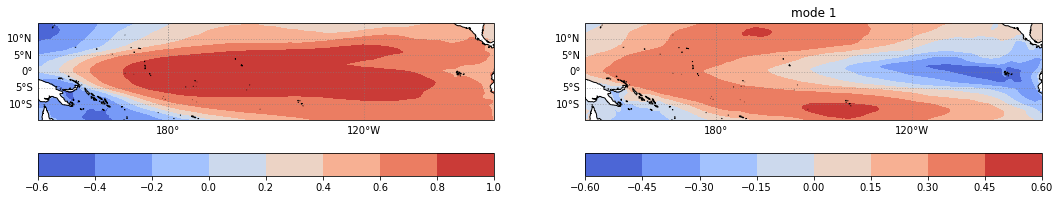

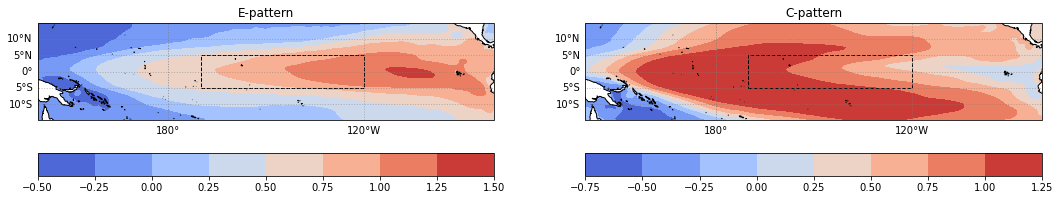

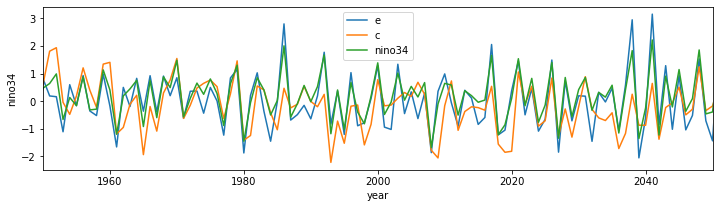

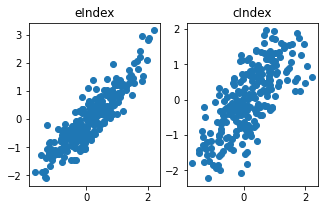

GFDL-ESM4
[-1, -1]


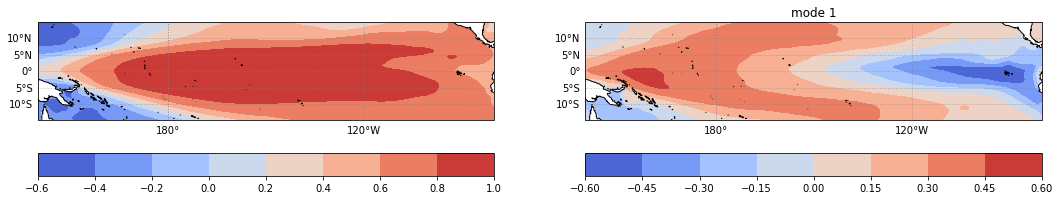

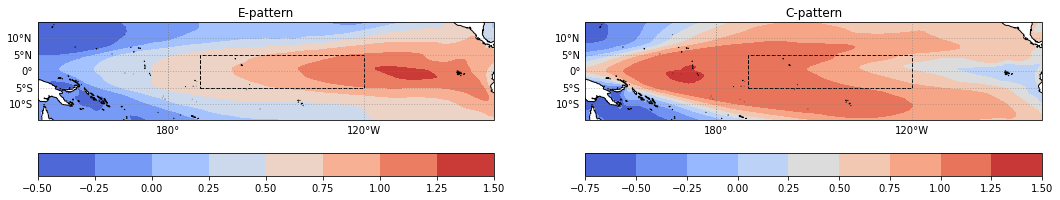

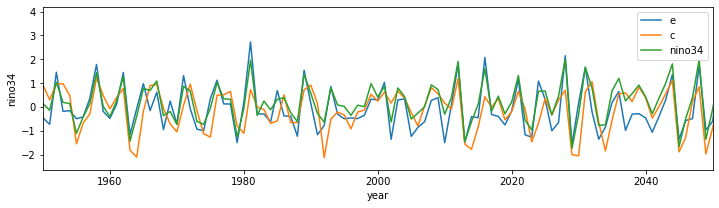

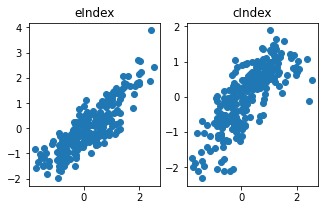

GISS-E2-1-G
[-1, 1]


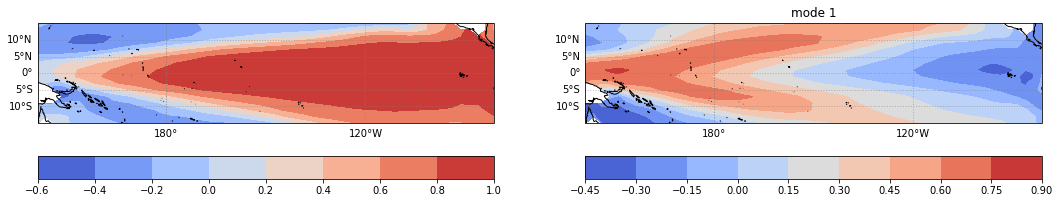

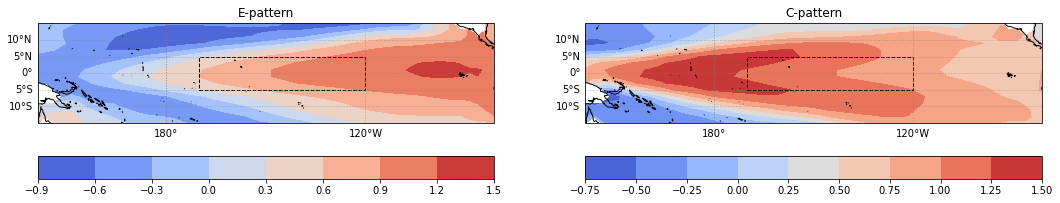

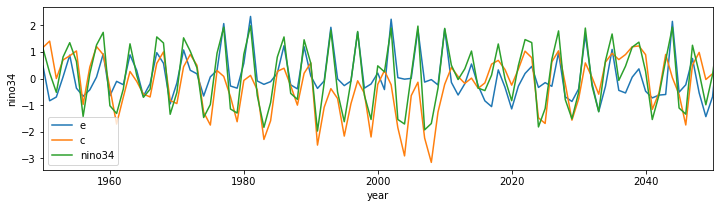

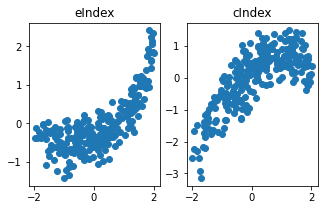

HadGEM3-GC31-LL
[-1, -1]


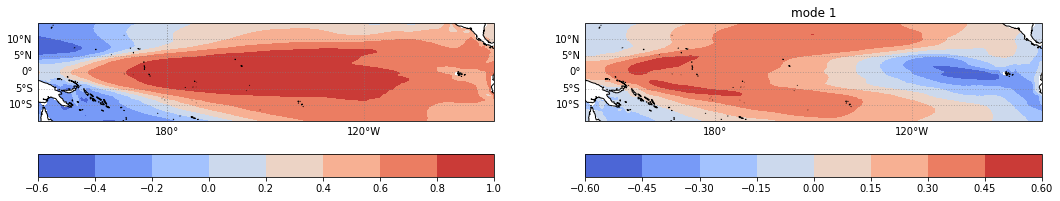

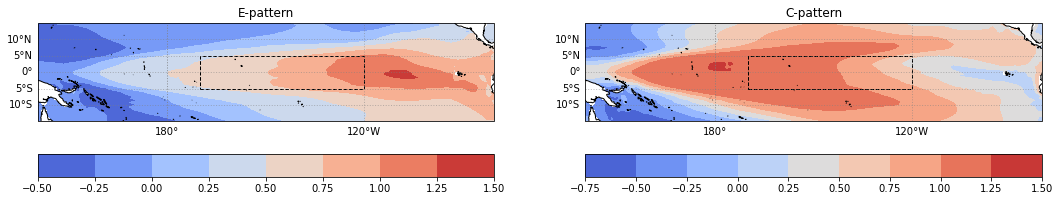

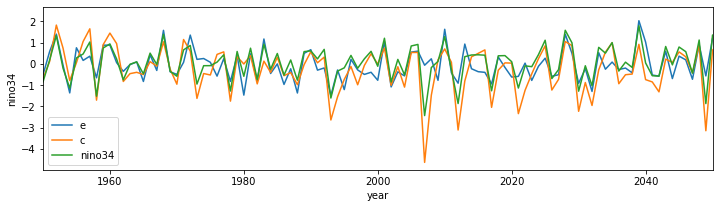

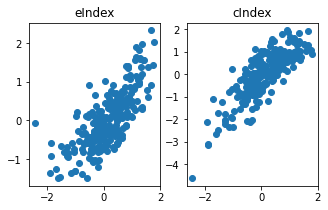

HadGEM3-GC31-MM
[1, -1]


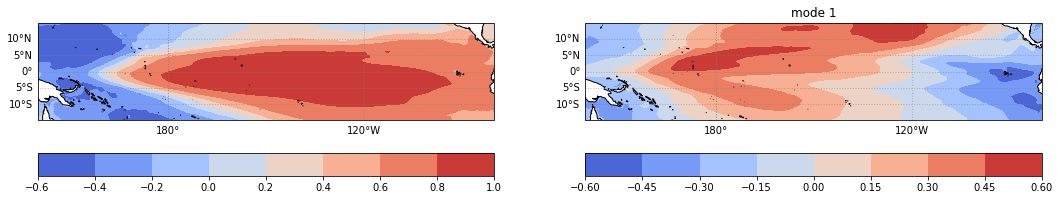

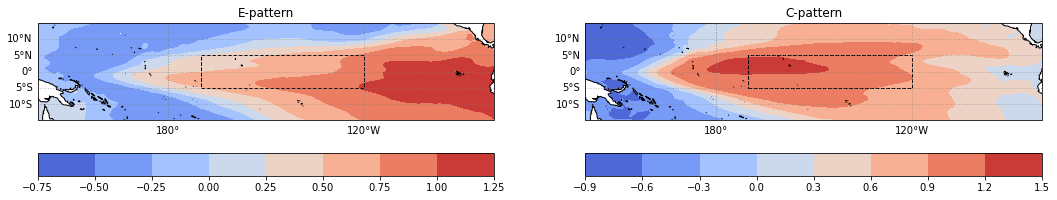

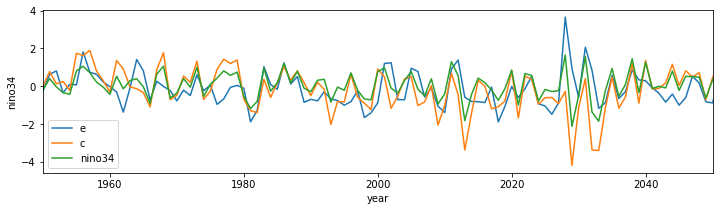

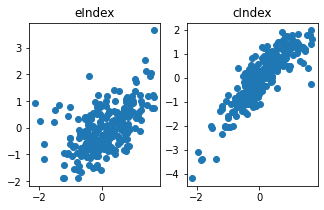

INM-CM4-8
[-1, 1]


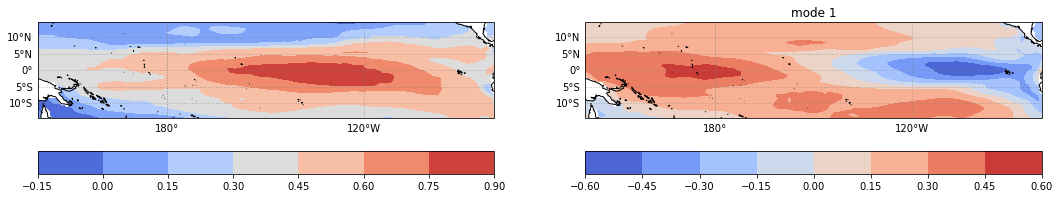

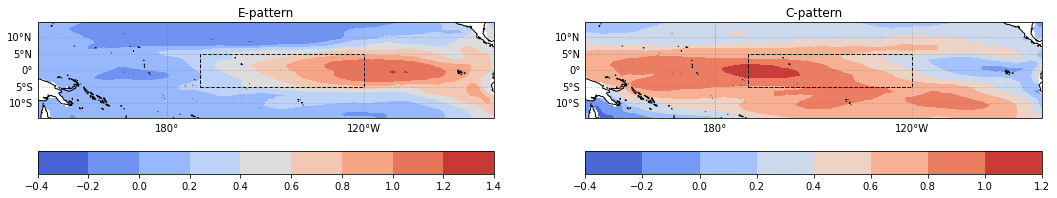

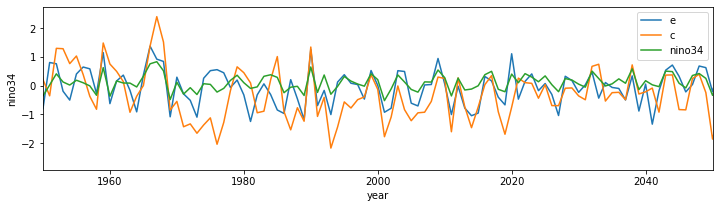

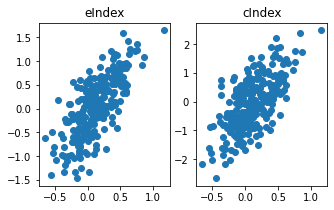

INM-CM5-0
[1, 1]


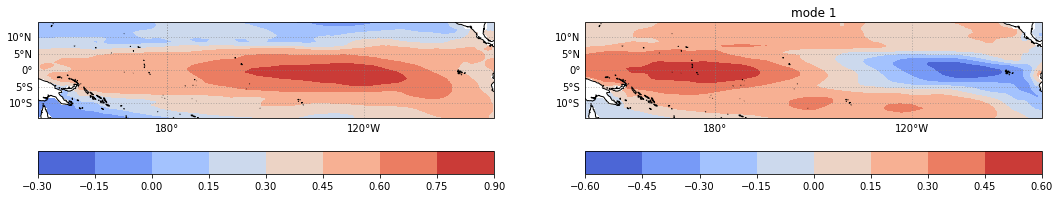

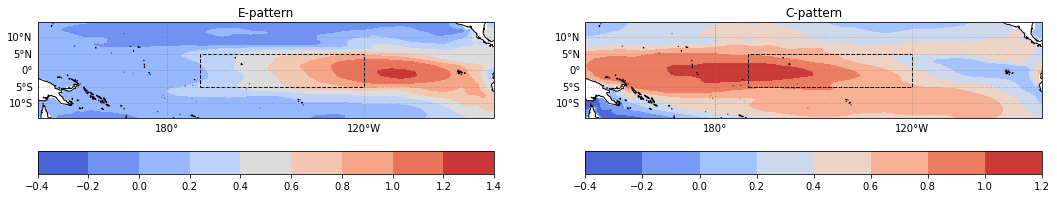

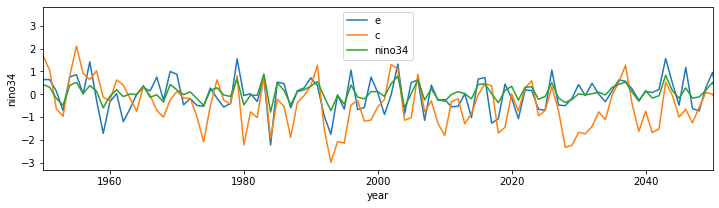

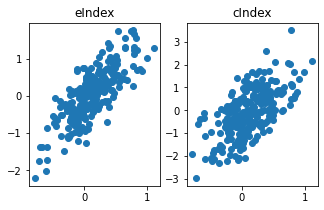

IPSL-CM6A-LR
[1, 1]


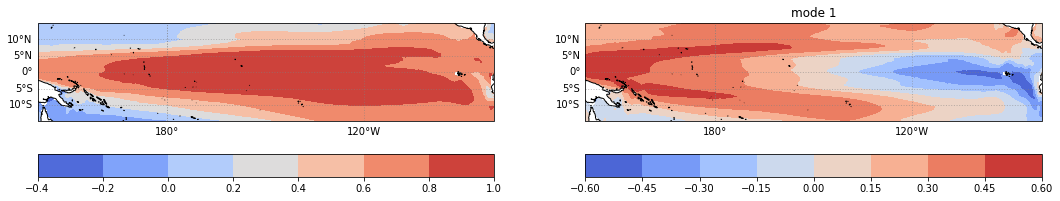

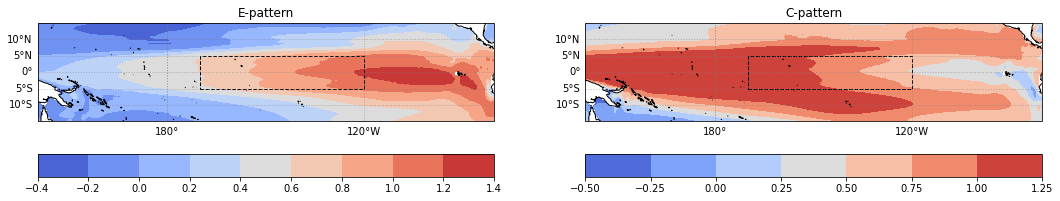

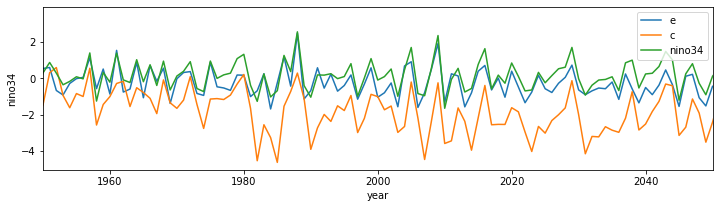

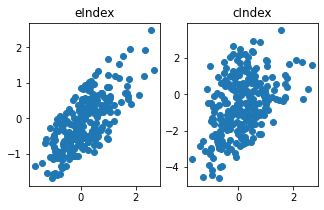

MCM-UA-1-0
[1, 1]


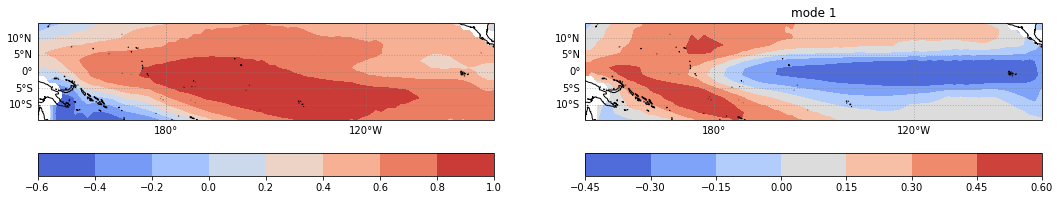

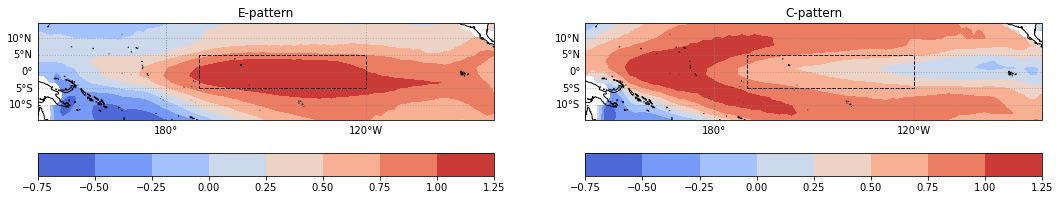

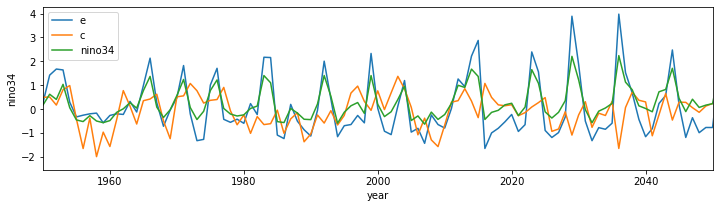

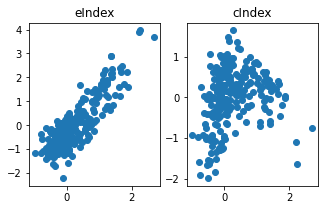

MIROC-ES2L
[1, 1]


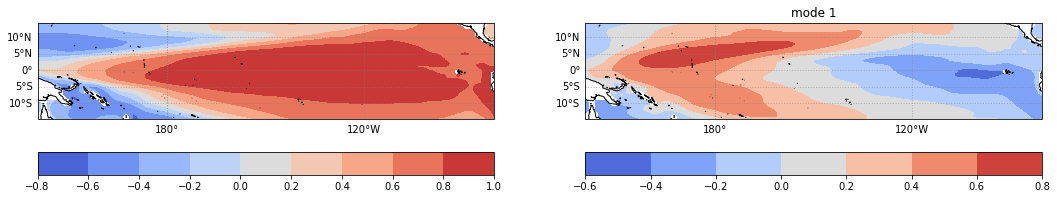

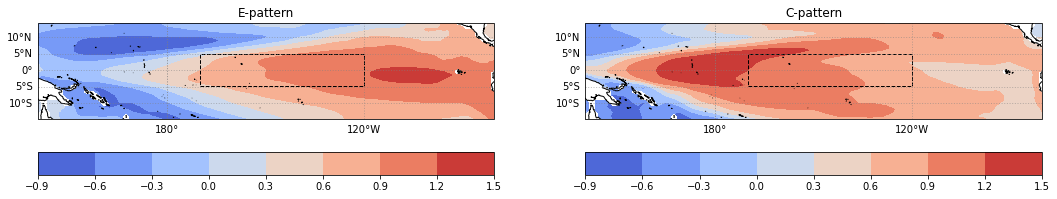

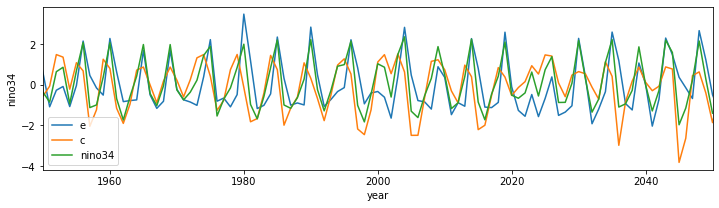

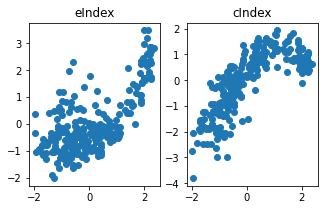

MIROC6
[1, -1]


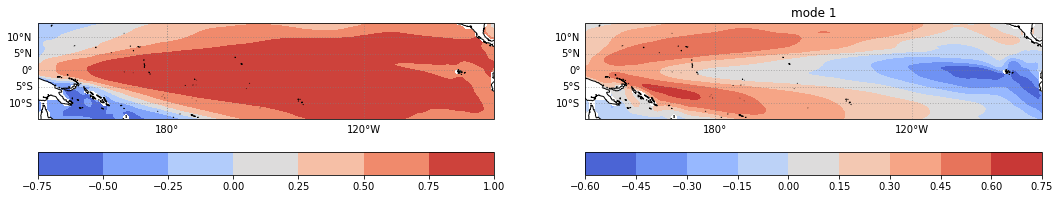

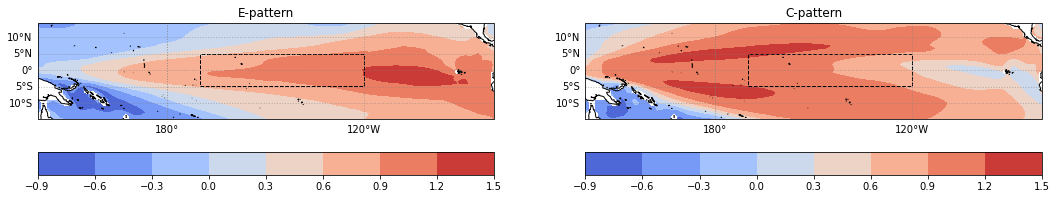

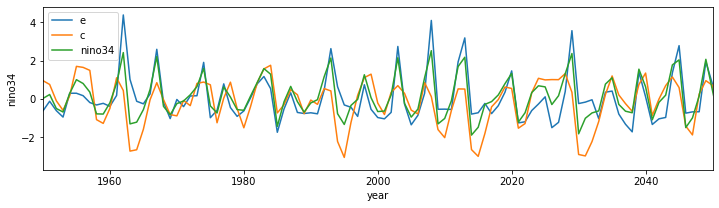

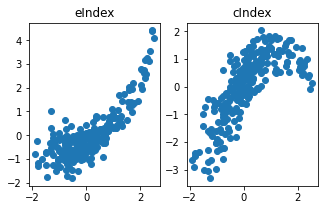

MPI-ESM1-2-HR
[1, 1]


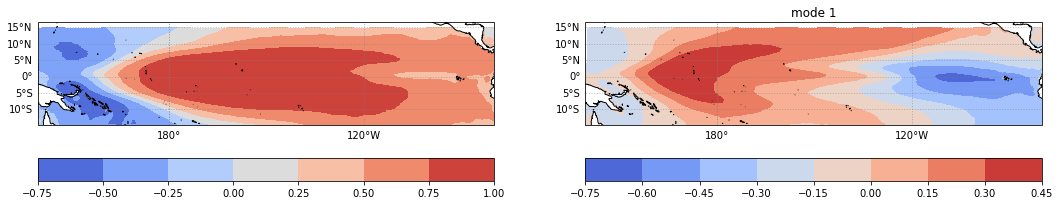

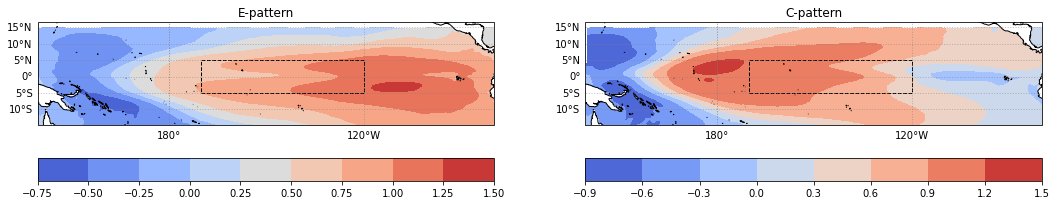

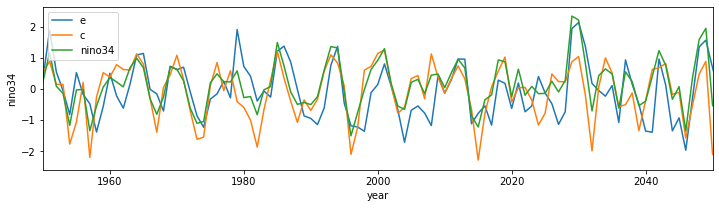

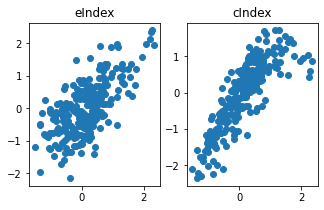

MPI-ESM1-2-LR
[1, -1]


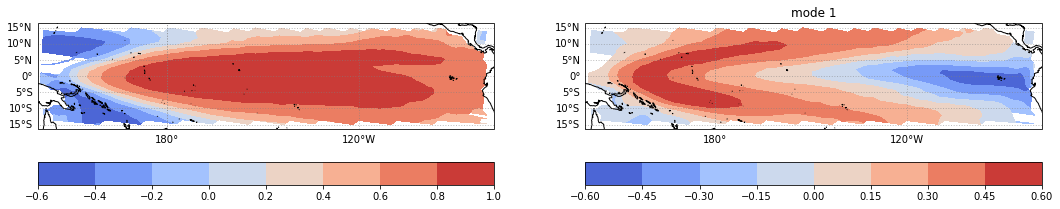

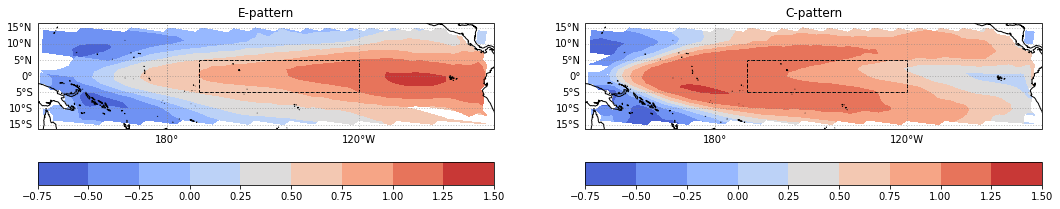

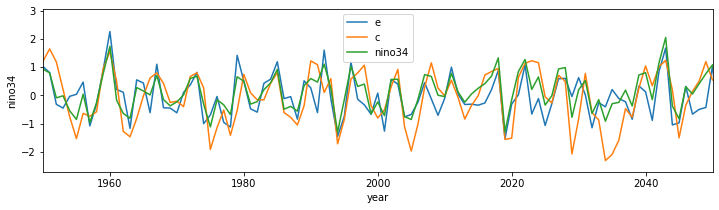

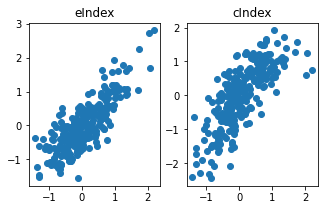

MRI-ESM2-0
[-1, 1]


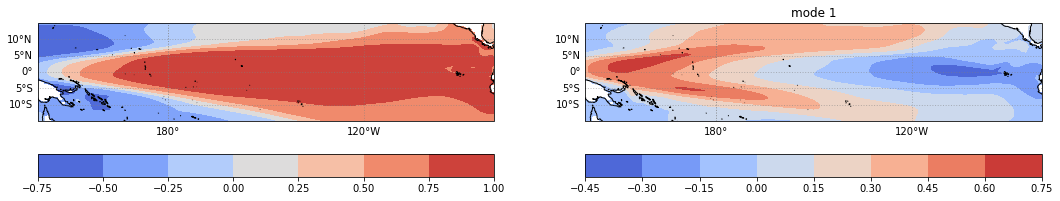

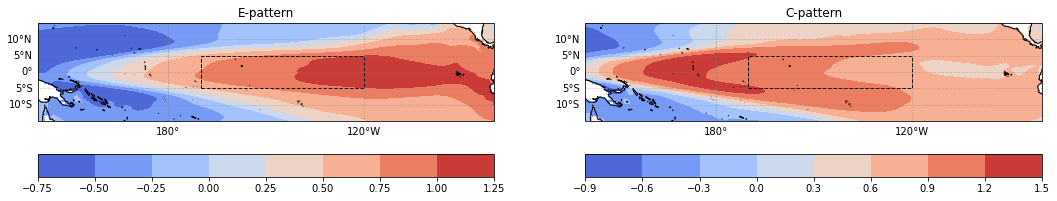

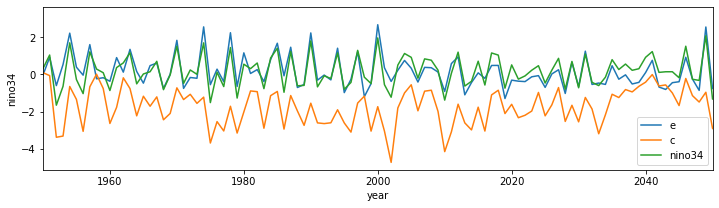

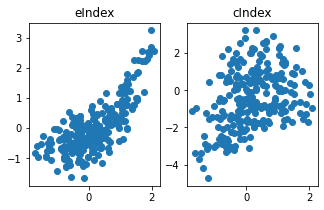

NESM3
[1, -1]


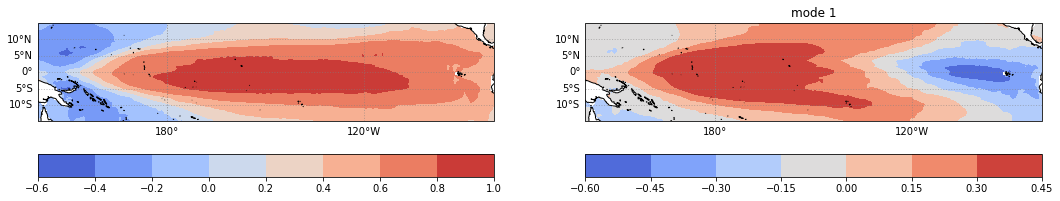

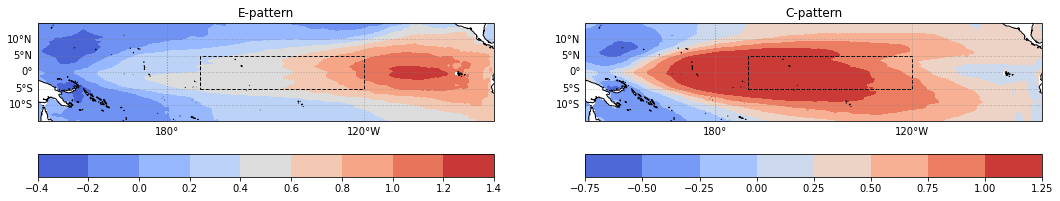

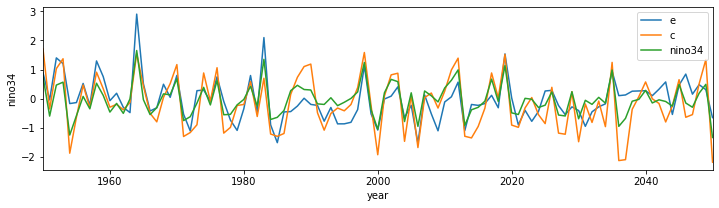

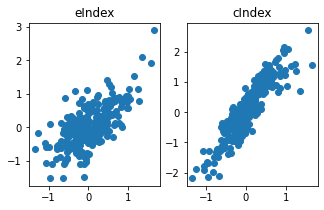

NorESM2-LM
[1, -1]


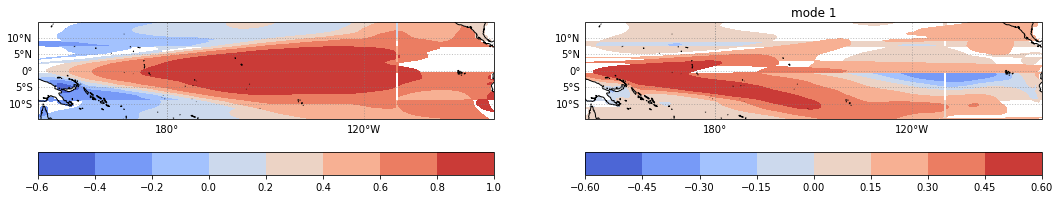

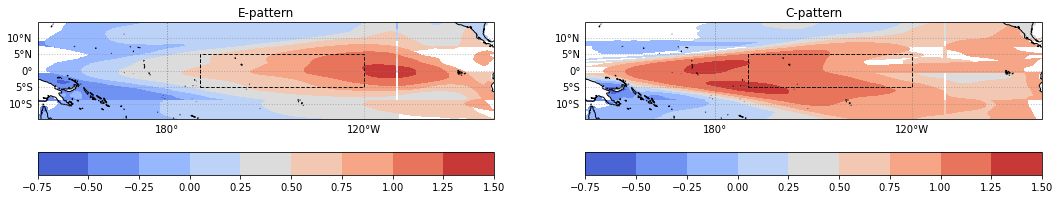

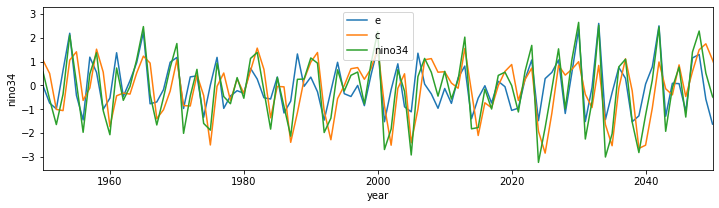

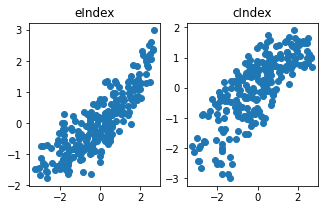

NorESM2-MM
[-1, -1]


In [ ]:
#somewhere to store results
allWarmSeasLs=list()

#for all models
for iModel in _model.scenarioMip[:,1]:
    try:
        print(iModel)
        multiplyBy=multipliers[iModel]
        print(multiplyBy)
        
        eofsXr=xarray.open_dataarray('results/cmipEcIndex/eof'+iModel+'.nc')
        
        #Open experiment results
        piConXr = xarray.open_dataset('results/cmipEcIndex/pcPiControl' + iModel + '.nc')
        
        expXr = xarray.open_dataset('results/cmipEcIndex/pcssp585' + iModel + '.nc')
        
        #merge into one Xr
        pcXr=xarray.concat([piConXr, expXr], 
                           dim='experiment', 
                           data_vars=['pc1','pc2'])
        pcXr['experiment']=['piControl','ssp585']
        
        #normalise using piControl as baseline
        std=piConXr.std()
        pcXr=pcXr/std
        
        #Calc e and c
        indexXr=xarray.Dataset()
        indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        #Average over warmseason and store
        allWarmSeasXr=tp.averageForTimePeriod(indexXr)
        allWarmSeasXr['model']=iModel
        allWarmSeasLs.append(allWarmSeasXr)
            
        #some data to plot
        warmSeasXr=allWarmSeasXr.sel(
            experiment='ssp585',year=range(1850,2099),drop=True)
        
        #some maps
        try:
            #first plots of pc1 and pc2
            fig=plt.figure(figsize=(18,12))
            for mode in [0,1]:
                ax=fig.add_subplot(1,2,mode+1,
                               projection=ccrs.Miller(central_longitude=210))
                ec.ensoPlotter(
                    multiplyBy[mode]*eofsXr.sel(mode=mode), ax)
            plt.title("mode " + str(mode))
            plt.show()

            #then plots of e pattern and c pattern
            fig=plt.figure(figsize=(18,12))
            ax=fig.add_subplot(1,2,1,
                           projection=ccrs.Miller(central_longitude=210))
            ec.ensoPlotter(
                multiplyBy[0]*eofsXr.sel(mode=0)-multiplyBy[1]*eofsXr.sel(mode=1),
                ax)
            ax.add_patch(mpatches.Rectangle(
                xy=nino34Box['xy'], 
                width=nino34Box['width'], 
                height=nino34Box['height'],
                edgecolor='black',facecolor='none', linestyle='dashed'))
            plt.title("E-pattern")

            ax=fig.add_subplot(1,2,2,
                           projection=ccrs.Miller(central_longitude=210))
            ec.ensoPlotter(multiplyBy[0]*eofsXr.sel(mode=0)+multiplyBy[1]*eofsXr.sel(mode=1), ax)
            ax.add_patch(mpatches.Rectangle(
                xy=nino34Box['xy'], 
                width=nino34Box['width'], 
                height=nino34Box['height'],
                edgecolor='black',facecolor='none', linestyle='dashed'))
            plt.title("C-pattern")
            plt.show()
            
        except Exception as e:
            print('Cannot print patterns')
            print(e)
            
        #comparisons of e and c index to nino34
        tradIndexXr = xarray.open_dataset(
            '../compound/results/cmipWarmSeasonIndeces/'+iModel+'tosssp585.nc'
        ).sel(year=range(1850,2099))
        
        #plot vs time
        fig = plt.figure(figsize=(12,3))
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        tradIndexXr.nino34.plot()

        
        plt.xlim([1950,2050])
        plt.legend(['e','c','nino34'])
        plt.show()
            
        #scatter plots
        fig = plt.figure(figsize=(8,3))

        plt.subplot(1,3,1)
        plt.scatter(tradIndexXr.nino34, warmSeasXr.eIndex)
        plt.title('eIndex')
        
        plt.subplot(1,3,2)
        plt.scatter(tradIndexXr.nino34, warmSeasXr.cIndex)
        plt.title('cIndex')

        plt.show()

    except Exception as e:
        print('skipping' + iModel ) 
        print(e)
    
#save the answers
ecXr=xarray.concat(allWarmSeasLs,'model').to_netcdf('results/cmip6EcIndex.nc')

# Some sanity checks to see if it looks ok:


In [10]:
results=xarray.open_dataset('results/cmip6EcIndex.nc').sel(experiment='ssp585',year=slice(1850,2099))

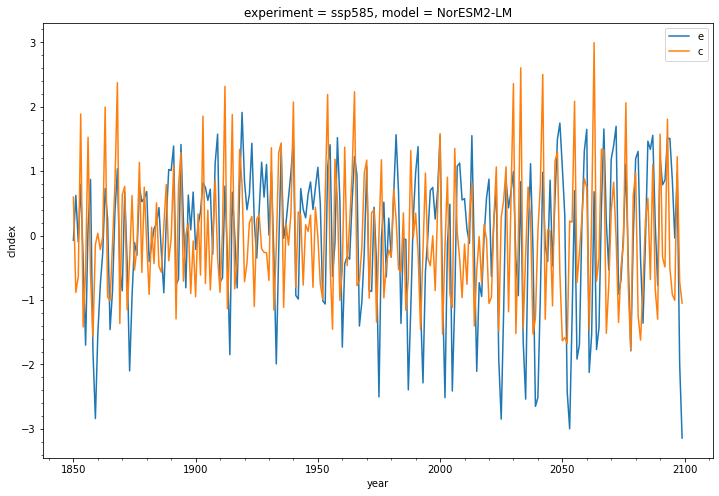

In [11]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.isel(model=35).eIndex.plot(label='e')
results.isel(model=35).cIndex.plot(label='c')

#Tidy up a bit
plt.minorticks_on()
plt.legend()

In [12]:
# A multi-model mean?

meanE = results.eIndex.mean(dim='model')
meanC = results.cIndex.mean(dim='model')

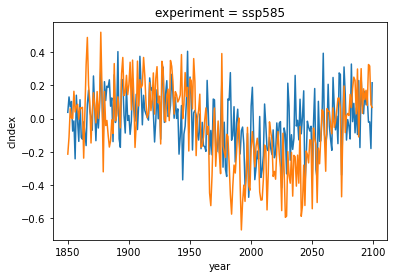

In [13]:
meanE.plot()
meanC.plot()

# 2. Calculate Compound Years for CESM6

# Find events in the e and c indeces

 1 sigma above/below mean
Using a piControl climatology

In [14]:
ecXr=xarray.open_dataset('results/cmip6EcIndex.nc')

piControlEcXr=ecXr.sel(experiment='piControl', drop=True)


# This should calculate stds for all experiments and all indeces
stdEcXr = piControlEcXr.std(dim='year')
stdEcXr

<xarray.Dataset>
Dimensions:  (model: 38)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    cIndex   (model) float64 0.9665 0.9581 0.9212 0.7275 ... 0.836 0.9335 0.8865
    eIndex   (model) float64 0.7026 0.8688 0.732 0.8898 ... 0.879 0.8744 0.7712

Apply the 1 sigma criteria

In [15]:
firePosEc, fireNegEc = compound.applyCriteria(ecXr, stdEcXr)

firePos: 
['cIndex', 'eIndex']
fireNeg: 
[]


In [16]:
# find where either index is saying there is an event
# this is a bit messy, you need to make sure Nan years stay as Nan (years for the piControl is different for all the models)

firePosEc['ecCombined']=(((firePosEc.cIndex+firePosEc.eIndex)>0)*1).where(
        firePosEc.cIndex.isnull()==False)
fireNegEc['ecCombined']=(((fireNegEc.cIndex+fireNegEc.eIndex)>0)*1).where(
    fireNegEc.cIndex.isnull()==False)


In [17]:
firePosEc.sel(experiment='piControl',model='CESM2')

<xarray.Dataset>
Dimensions:     (year: 5343)
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
    experiment  <U9 'piControl'
    model       <U5 'CESM2'
Data variables:
    cIndex      (year) float64 1.0 0.0 0.0 1.0 0.0 0.0 ... nan nan nan nan nan
    eIndex      (year) float64 1.0 0.0 0.0 0.0 1.0 1.0 ... nan nan nan nan nan
    ecCombined  (year) float64 1.0 0.0 0.0 1.0 1.0 1.0 ... nan nan nan nan nan

In [18]:
#Find events in the trad indeces

In [19]:
tradIndecesXr = xarray.concat([
    xarray.open_dataset('results/cmip6'+experiment+'TradIndecesTos.nc') for experiment in ['piControl','ssp585']], 
'experiment')

tradIndecesXr['experiment']=['piControl','ssp585']



In [20]:
piControlXr=xarray.open_dataset('results/cmip6piControlTradIndecesTos.nc')

piControlXr.model.values

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-WACCM', 'CIESM',
       'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'CanESM5-CanOE', 'EC-Earth3', 'EC-Earth3-CC',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FIO-ESM-2-0', 'GFDL-CM4',
       'GFDL-ESM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0',
       'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype=object)

In [21]:
stdXr = piControlXr.std(dim='year')

criteriaXr= xarray.merge(
    (stdXr['nino34'], stdXr['nino4'], stdXr['dmi'], stdXr['eastIO'],  stdXr['sam']/2)
)

In [22]:
firePosTrad, fireNegTrad = compound.applyCriteria(tradIndecesXr, criteriaXr)


firePos: 
['nino34', 'dmi', 'nino4']
fireNeg: 
['eastIO', 'sam']


Now we can merge the events from each method

In [23]:
firePos=xarray.merge([firePosEc,firePosTrad])
fireNeg=xarray.merge([fireNegEc,fireNegTrad])

In [24]:
firePos

<xarray.Dataset>
Dimensions:     (experiment: 2, model: 38, year: 5343)
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
  * experiment  (experiment) object 'piControl' 'ssp585'
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    cIndex      (model, year, experiment) float64 nan nan nan ... nan nan nan
    eIndex      (model, year, experiment) float64 nan nan nan ... nan nan nan
    ecCombined  (model, year, experiment) float64 nan nan nan ... nan nan nan
    nino34      (experiment, model, year) float64 nan nan nan ... nan nan nan
    dmi         (experiment, model, year) float64 nan nan nan ... nan nan nan
    nino4       (experiment, model, year) float64 nan nan nan ... nan nan nan
    eastIO      (experiment, model, year) float64 nan nan nan ... nan nan nan
    sam         (experiment, model, year) float64 nan nan nan ... nan nan nan

In [25]:
fireXr=xarray.concat([firePos,fireNeg], 'fire')
fireXr['fire']=['pos','neg']

fireXr.to_netcdf('results/cmipEcEvents.nc')


# Put the resutls in 30 year bins

In [26]:
#ssp585
fireBinnedXr=overlapBins.binSum(fireXr.sel(experiment='ssp585', year=slice(1850,2100),drop=True))


In [27]:
fireBinnedXr

<xarray.Dataset>
Dimensions:     (fire: 2, model: 38, year: 23)
Coordinates:
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * fire        (fire) <U3 'pos' 'neg'
  * year        (year) int64 1865 1875 1885 1895 1905 ... 2055 2065 2075 2085
Data variables:
    cIndex      (year, fire, model) float64 29.0 22.0 6.0 6.0 ... 8.0 3.0 3.0
    eIndex      (year, fire, model) float64 2.0 9.0 5.0 5.0 ... 2.0 5.0 11.0 1.0
    ecCombined  (year, fire, model) float64 29.0 26.0 9.0 9.0 ... 10.0 13.0 3.0
    nino34      (year, fire, model) float64 6.0 2.0 4.0 4.0 ... 3.0 9.0 10.0 2.0
    dmi         (year, fire, model) float64 7.0 2.0 4.0 5.0 ... 1.0 0.0 0.0 0.0
    nino4       (year, fire, model) float64 5.0 2.0 5.0 6.0 ... 3.0 7.0 7.0 2.0
    eastIO      (year, fire, model) float64 7.0 4.0 4.0 4.0 ... 4.0 4.0 3.0 0.0
    sam         (year, fire, model) float64 14.0 6.0 11.0 ... 29.0 30.0 30.0
Attributes:
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

In [28]:
# and for piControl
binSumLs = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        piCModelXr=fireXr.sel(experiment='piControl', drop=True).sel(model=iModel)
        binSumXr=overlapBins.binSum(piCModelXr.where(piCModelXr.isnull()==False, drop=True))
        binSumLs.append(binSumXr)
        
    except Exception as e:
        print(e)
        
piControlBinnedXr = xarray.concat(binSumLs, 'model')

In [29]:
piControlBinnedXr

<xarray.Dataset>
Dimensions:     (fire: 2, model: 38, year: 993)
Coordinates:
  * year        (year) int64 16 26 36 46 56 66 ... 7824 7834 7844 7854 7864 7874
  * model       (model) <U16 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * fire        (fire) <U3 'pos' 'neg'
Data variables:
    cIndex      (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    eIndex      (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    ecCombined  (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    nino34      (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    dmi         (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    nino4       (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    eastIO      (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
    sam         (model, year, fire) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

In [30]:
firePosBinnedXr=fireBinnedXr.sel(fire='pos', drop=True)
piControlPosBinnedXr=piControlBinnedXr.sel(fire='pos', drop=True)

fireNegBinnedXr=fireBinnedXr.sel(fire='neg', drop=True)
piControlNegBinnedXr=piControlBinnedXr.sel(fire='neg', drop=True)

# Time of emergence by index

In [31]:
%run utils/emergence.ipynb

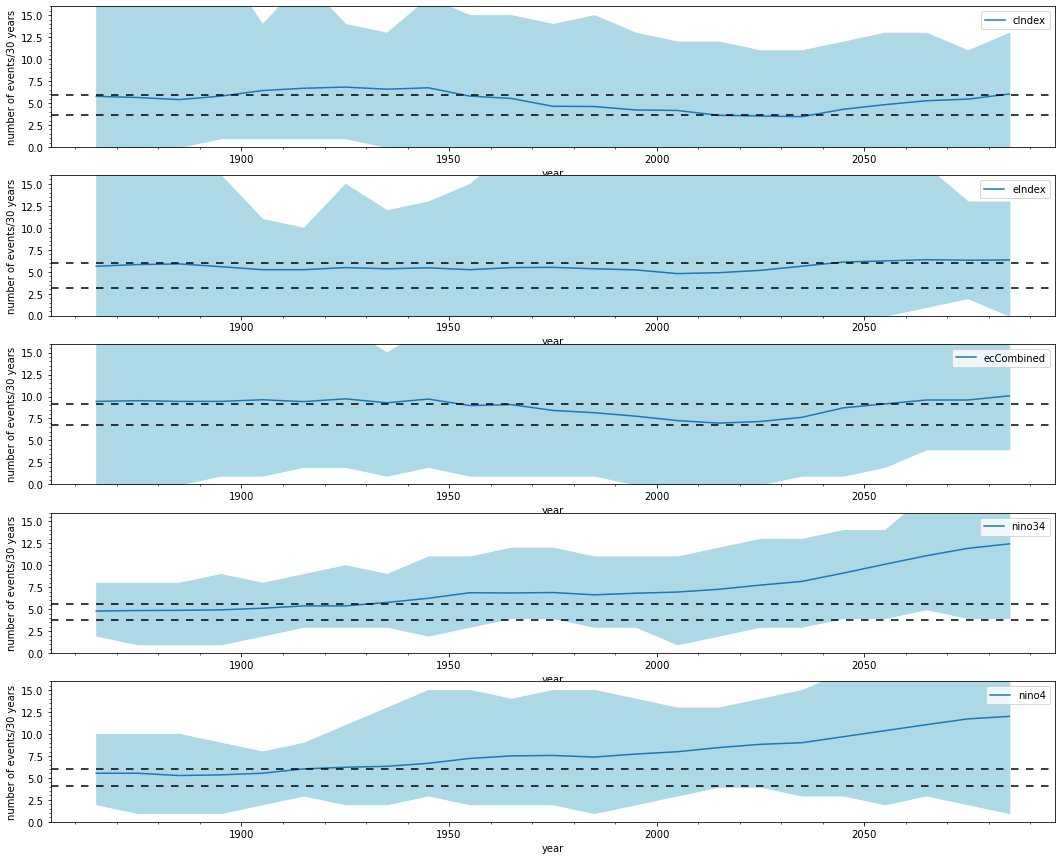

In [32]:
emergePlot(firePosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']],
piControlPosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']]
      )
plt.show()

And with the reduced model set from wang et al

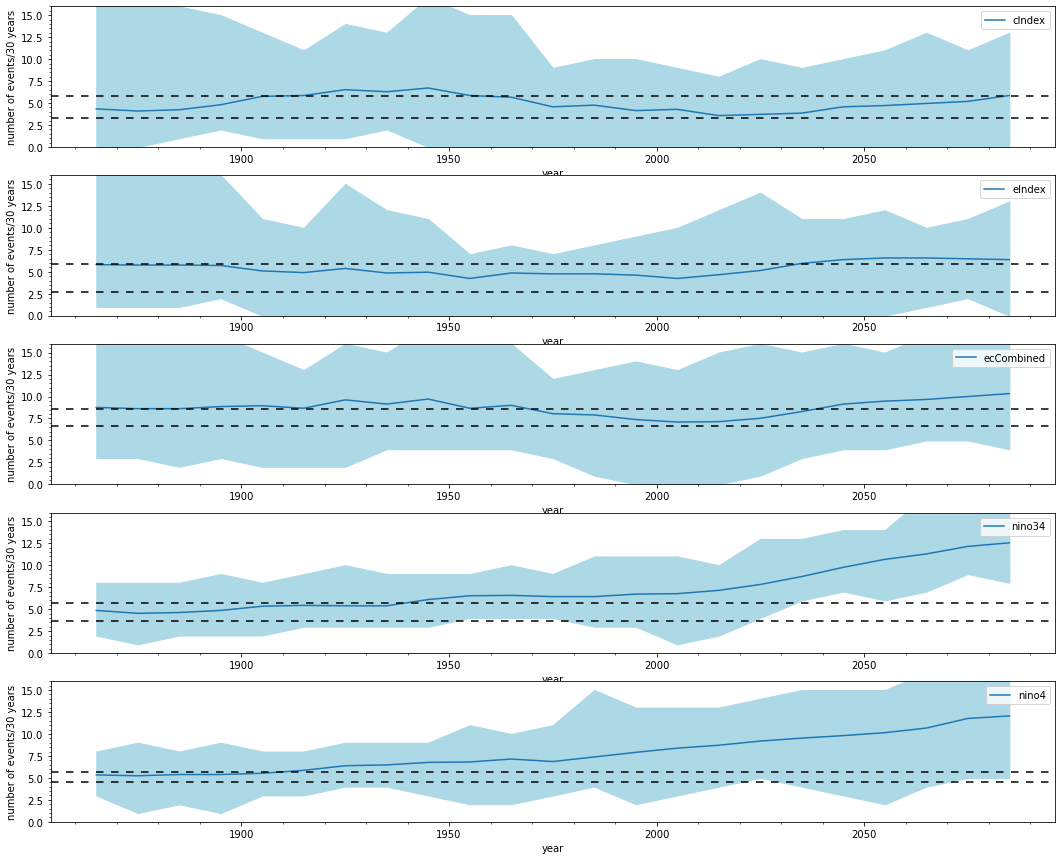

In [33]:
emergePlot(firePosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']].sel(model=_model.wangModelSet),
piControlPosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']].sel(model=_model.wangModelSet)
      )
plt.show()

And the negative case

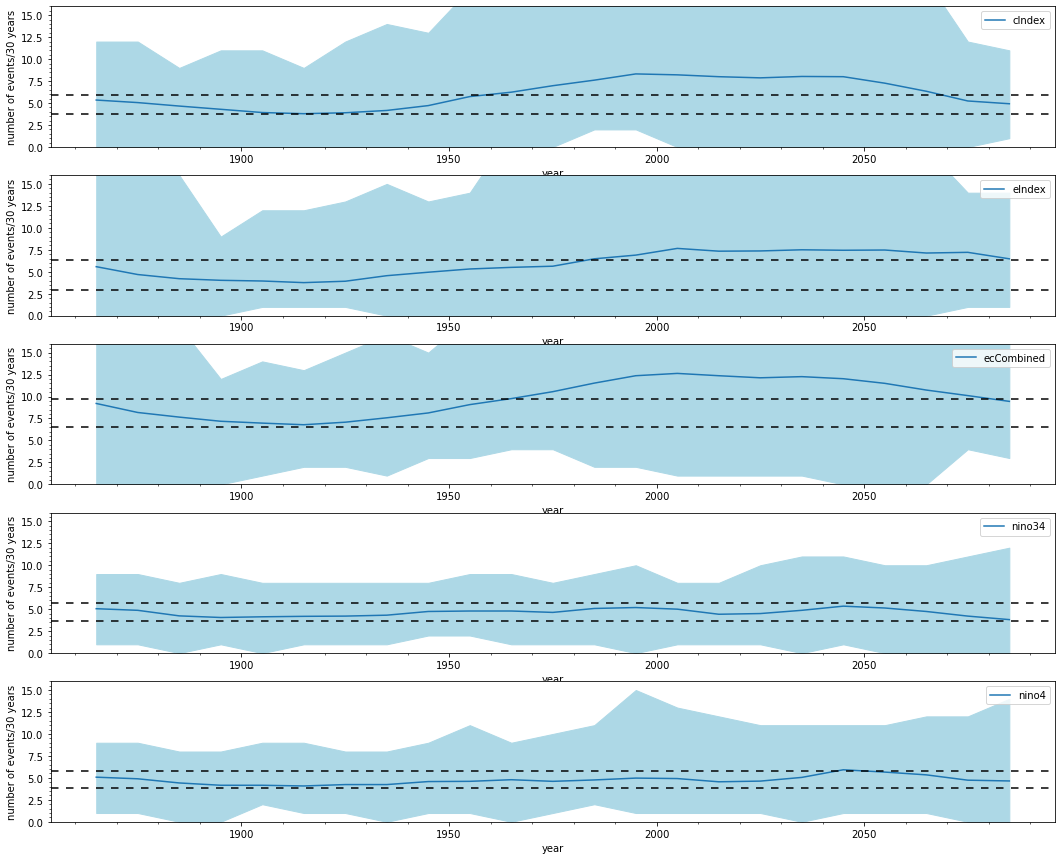

In [34]:
emergePlot(fireNegBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']],
piControlNegBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']]
      )
plt.show()

 time of emergence by model and index

# Calculate the compounding years and plot an example

In [35]:
allCompoundsXr=xarray.concat([
    compound.compound(firePos),
    compound.compound(fireNeg)],
    'fire')

allCompoundsXr['fire']=['pos','neg']

allCompoundsXr.to_netcdf('results/cmip6EcCompounds.nc') 

eIndexEastioSam
eIndexDmiSam
nino4EastioSam
nino4DmiSam
nino34EastioSam
nino34DmiSam
cIndexEastioSam
cIndexDmiSam
ecCombinedEastioSam
ecCombinedDmiSam
eIndexEastioSam
eIndexDmiSam
nino4EastioSam
nino4DmiSam
nino34EastioSam
nino34DmiSam
cIndexEastioSam
cIndexDmiSam
ecCombinedEastioSam
ecCombinedDmiSam


In [36]:
allCompoundsXr.eIndexDmiSam.sel(model='CIESM')

<xarray.DataArray 'eIndexDmiSam' (fire: 2, compound: 9, year: 5343, experiment: 2)>
array([[[[ 3., nan],
         [ 0., nan],
         [ 0., nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[ 1., nan],
         [ 0., nan],
         [ 0., nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[ 0., nan],
         [ 0., nan],
         [ 0., nan],
         ...,
...
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[ 0., nan],
         [ 0., nan],
         [ 0., nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]],

        [[ 0., nan],
         [ 1., nan],
         [ 1., nan],
         ...,
         [nan, nan],
         [nan, nan],
         [nan, nan]]]])
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
  * experiment  (experiment) object 'piControl' 'ssp585'
    model       <U5 'CIESM'
  * compound    (compound) <U11 'nEvents' 'all3' ... 'sam' 'anyCompound'
  * fire        (fire) <U3 'pos' 'neg'

Text(0.5, 1.0, 'CIESM: Pairs and all-three compounds for individal years')

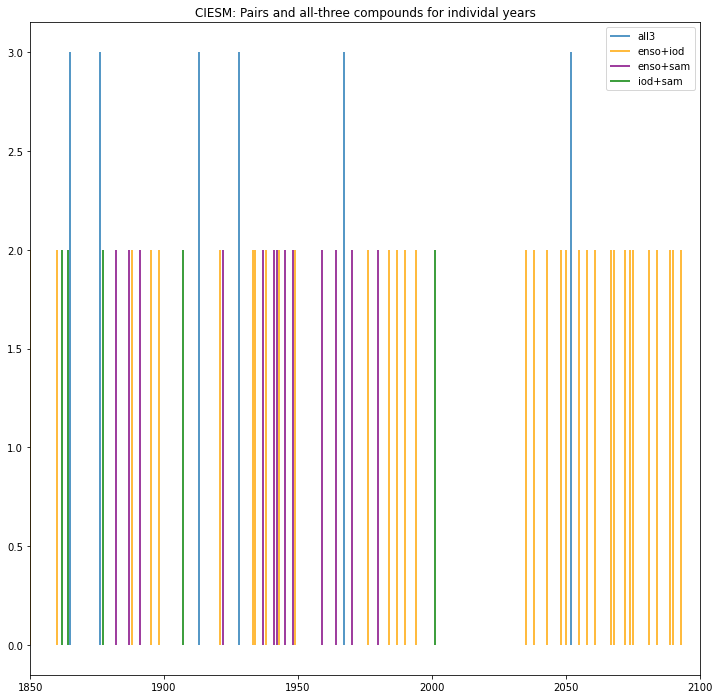

In [37]:
firePosCompound=allCompoundsXr.ecCombinedDmiSam.to_dataset('compound').sel(model='CIESM', experiment='ssp585', fire='pos', drop=True)

toPlot=3*firePosCompound.all3

plt.figure(figsize=(12,12))

plt.vlines(
    x=firePosCompound.year, 
    ymin=0,
    ymax=toPlot,
    label='all3'
)

colors=['orange', 'purple', 'green']
iCol = 0

for iPair in allCompoundsXr.attrs['pairs']:
    plt.vlines(
        x=firePosCompound.year, 
        ymin=0,
        ymax=2*firePosCompound[iPair],
        color=colors[iCol],
        label=iPair
    )
    iCol+=1
plt.legend()
plt.xlim(1850,2100)
plt.title('CIESM'+': Pairs and all-three compounds for individal years')

In [38]:
allCompoundsXr

<xarray.Dataset>
Dimensions:              (compound: 9, experiment: 2, fire: 2, model: 38, year: 5343)
Coordinates:
  * year                 (year) int64 1 2 3 4 5 6 ... 7889 7890 7891 7892 7893
  * experiment           (experiment) object 'piControl' 'ssp585'
  * model                (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound             (compound) <U11 'nEvents' 'all3' ... 'anyCompound'
  * fire                 (fire) <U3 'pos' 'neg'
Data variables:
    eIndexEastioSam      (fire, compound, model, year, experiment) float64 na...
    eIndexDmiSam         (fire, compound, model, year, experiment) float64 na...
    nino4EastioSam       (fire, compound, experiment, model, year) float64 na...
    nino4DmiSam          (fire, compound, experiment, model, year) float64 na...
    nino34EastioSam      (fire, compound, experiment, model, year) float64 na...
    nino34DmiSam         (fire, compound, experiment, model, year) float64 na...
    cIndexEastioSam      (fire, compound, model, year, experiment) float64 na...
    cIndexDmiSam         (fire, compound, model, year, experiment) float64 na...
    ecCombinedEastioSam  (fire, compound, model, year, experiment) float64 na...
    ecCombinedDmiSam     (fire, compound, model, year, experiment) float64 na...
Attributes:
    indeces:  ['enso', 'iod', 'sam']
    pairs:    ['enso+iod', 'enso+sam', 'iod+sam']
    others:   ['all3', 'anyCompound', 'nEvents']